# Customer Churn Prediction

Vincent Luong

## Introduction: Predicting Customer Churn in Subscription-Based Services

In recent years, monthly subscription-based services have surged in popularity, spanning industries such as streaming (e.g., Netflix, Spotify), SaaS (Software as a Service), fitness (e.g., Peloton), and e-commerce (e.g., Amazon Prime). These models offer convenience and consistent revenue streams, making them an attractive business strategy. However, they also introduce a critical metric to monitor: **customer churn**.

**Customer Churn**: refers to the percentage of customers who cancel or stop renewing their subcriptions during a given time period.  High churn rates can significantlyt impact revenue and long-term growth, especially in competitive markets were acquiring new customers is often more expenstive then retaining existing ones.

To mitigate churn and retain consumers, we can implement strategies such as:
- Personalized offers and retention campaigns
- Improving onboarding and customer support
- Monitoring engagement metrics to intervene before customers churn

To stay ahead of potential losses, we can utilize data-driven churn prediction models that help us act proactively rather than reactively. These models analyze customer behavior and identify individuals who are at a high risk of leaving, allowing companies to intervene before it’s too late. Common machine learning approaches used for predicting churn include:
- **Logistic Regression**: A simple and interpretable baseline model for binary classification
- **Decision Trees and Random Forests**: Useful for capturing nonlinear patterns and feature importance
- **Gradient Boosting Machines**: Models such as XGBoost and LightGBM are power ensemble methods with strong predictive performance
- **Neural Networks**: Applied for complex. high-dimensional data scenarios
- **Survival Analysis**: Useful when modeling when a customer will churn, not just if.

In this project, we aim to develop a machine learning model to predict whether a customer is likely to churn based on historical subscription and behavioral data introduced below. This prediction can empower businesses to make informed decisions that reduce churn and enhance customer lifetime value.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns
sns.set_theme(style='white') 
%matplotlib inline
import re
import math 
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import six  
from numpy import random as rand 
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.figure_factory as ff
from sklearn.preprocessing import PowerTransformer,FunctionTransformer, KBinsDiscretizer,OrdinalEncoder, OneHotEncoder, LabelEncoder,StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mutual_info_score, f1_score,recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error , roc_auc_score,auc, roc_curve,balanced_accuracy_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression,SelectKBest, f_classif, f_regression,chi2, SelectPercentile,RFE, VarianceThreshold
from sklearn.model_selection import cross_val_score, cross_validate,StratifiedKFold,GridSearchCV,train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.utils.class_weight import compute_class_weight
import shap 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from kmodes.kprototypes import KPrototypes
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.svm import SVC
from scipy.stats import shapiro, normaltest
from itertools import combinations
from scipy.stats import chi2_contingency,wilcoxon, mannwhitneyu, skew
import scipy.stats as ss
from IPython.display import Image 
import statsmodels.api as sm 
import warnings

### Data

The [Telco Customer Churn dataset 11.1.3+](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data), originally provided by IBM and hosted on Kaggle, offers detailed information about a telecommunications company's customers and their subscription behavior. It contains 7,043 customer records with 33 features, covering demographics, account details, and service usage patterns. The dataset has been updated to include more comprehensive information, providing deeper insights into customer behavior and churn factors.

Features Include:

🔑 Identifiers & Location
1. `CustomerID`: A unique ID that identifies each customer
2. `Count`: A value used in reporting/dashboarding to sum up the number of customers in a filtered set
3. `Country`: The country of the customer's primary residence
4. `State`: The state of hte customer's primary residence
5. `City`: The city of hte customer's primary residence
6. `Zip Code`: The zip code of the customer's primary residence
7. `Lat Long`: The combined latitude and longitude of the customer's primary residence
8. `Lattitude`: The latitude of the customer's primary residence
9. `Longitude`: The longitude of the customer's primary residence
    
👤 Demographics
1. `Age`: A numerical feature incdicating the age of a customer
2. `Married`: A binary feature indicating whether the customer is married (0 or 1)
3. `Dependents`: Whether the customer has dependents or not (Yes or No)
4. `Number of Dependents`: A numerical feature indicating the number of dependents a customer has
5. `Referred a Friend`: A binary feature indicating whether a customer has referred a friend (0 or 1)
6. `Number of Referrals`: A numerical feature indicatin the number of referrals a customer has given
   
⏳ Customer Tenure
1. `Tenure Months`:  Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above

📞 Services Subscribed
1. `PhoneService`: Indicates if the customer subscribes to home phone service with the company (Yes, No)
2. `MultipleLines`:  Indicates if the customer subscribes to multiple telephone lines with the company (Yes, No)
3. `InternetService`: Indicates if the customer subscribes to Internet service with the company (No, DSL, Fiber Optic, Cable)
4. `OnlineSecurity`: Indicates if the customer subscribes to an additional online security service provided by the company (Yes, No)
5. `OnlineBackup`: Indicates if the customer subscribes to an additional online backup service provided by the company (Yes, No)
6. `Device Protection`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company (Yes, No)
7. `Tech Support`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times (Yes, No)
8. `Streaming TV`: Indicates if the customer uses their Internet service to stream television programing from a third party provider (Yes, No, The company does not charge an additional fee for this service)
9. `Streaming Movies`: Indicates if the customer uses their Internet service to stream movies from a third party provider (Yes, No, The company does not charge an additional fee for this service)

💳 Billing & Payment
1. `Contract`: Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
2. `Paperless Billing`: Indicates if the customer has chosen paperless billing (Yes, No)
3. `Payment Method`: Indicates how the customer pays their bill (Bank Withdrawal, Credit Card, Mailed Check)
4. `Monthly Charge`: Indicates the customer’s current total monthly charge for all their services from the company.
5. `Total Charges`: Indicates the customer's total charges, calulated to the end of the quarter specified above.

🔍 Churn-Related Information
1. `Churn Label`: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.
2. `Churn Value`: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.
3. `Churn Score`: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.
4. `CLTV`: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.
5. `Churn Reason`:  A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [2]:
df_telco = pd.read_excel('data/Telco_customer_churn.xlsx').drop(columns=['Count','Country','State', 'Zip Code','Lat Long','Latitude','Longitude','Payment Method','Churn Label'])
df_demo = pd.read_excel('data/Telco_customer_churn_demographics.xlsx').drop(columns=['Gender','Senior Citizen','Dependents','Under 30','Count']).rename(columns={'Customer ID':'CustomerID'})
df_services = pd.read_excel('data/Telco_customer_churn_services.xlsx').drop(columns=['Count','Quarter','Tenure in Months','Phone Service','Multiple Lines','Internet Type','Internet Service','Online Security','Online Backup','Device Protection Plan','Streaming TV','Streaming Movies','Contract','Paperless Billing','Monthly Charge','Total Charges']).rename(columns={'Customer ID':'CustomerID'})
df_churn = pd.read_excel('data/Telco_customer_churn_status.xlsx').drop(columns=['Count','Quarter','Churn Label','Churn Value','Churn Reason','Churn Score','CLTV']).rename(columns={'Customer ID':'CustomerID'})
df = pd.merge(left=df_telco,right=df_demo, on='CustomerID').merge(right=df_services, on='CustomerID').merge(right=df_churn,on='CustomerID').rename(columns={'Churn Value':'Churn'}).drop(columns=['CustomerID','Tech Support'])
demo_graph_var = ['Gender','Age','Senior Citizen', 'Married', 'Dependents','Number of Dependents']
services_var = ['Referred a Friend','Number of Referrals','Tenure Months','Offer','Phone Service','Avg Monthly Long Distance Charges','Multiple Lines','Internet Service','Avg Monthly GB Download','Online Security','Online Backup','Device Protection','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']
con_dat = df[demo_graph_var+services_var+['Churn Category']+['Churn']]

con_dat.head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn
0,Male,37,No,No,No,0,No,0,2,None,Yes,10.47,No,DSL,21,Yes,Yes,No,No,No,No,No,Yes,Month-to-month,Yes,Credit Card,53.85,108.15,0.0,0,20.94,129.09,Competitor,1
1,Female,19,No,No,Yes,2,No,0,2,None,Yes,9.12,No,Fiber optic,51,No,No,No,No,No,No,No,Yes,Month-to-month,Yes,Bank Withdrawal,70.70,151.65,0.0,0,18.24,169.89,Other,1
2,Female,31,No,No,Yes,2,No,0,8,None,Yes,12.15,Yes,Fiber optic,26,No,No,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank Withdrawal,99.65,820.5,0.0,0,97.20,917.70,Other,1
3,Female,23,No,Yes,Yes,3,No,0,28,Offer C,Yes,4.89,Yes,Fiber optic,47,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank Withdrawal,104.80,3046.05,0.0,0,136.92,3182.97,Other,1
4,Male,38,No,No,Yes,1,No,0,49,None,Yes,44.33,Yes,Fiber optic,11,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank Withdrawal,103.70,5036.3,0.0,0,2172.17,7208.47,Competitor,1


In [3]:
con_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Referred a Friend                  7043 non-null   object 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure Months                      7043 non-null   int64  
 9   Offer                              7043 non-null   object 
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

In [4]:
df_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Avg Monthly Long Distance Charges  7043 non-null   float64
 5   Avg Monthly GB Download            7043 non-null   int64  
 6   Premium Tech Support               7043 non-null   object 
 7   Streaming Music                    7043 non-null   object 
 8   Unlimited Data                     7043 non-null   object 
 9   Payment Method                     7043 non-null   object 
 10  Total Refunds                      7043 non-null   float64
 11  Total Extra Data Charges           7043 non-null   int64

From the dataset above, we observe that the columns `Churn Label` and `Churn Value` are directly correlated, with a one-to-one relationship. Including both as target variables would introduce redundancy and could lead to artificially inflated model performance. To avoid this, we will remove `Churn Label` and use only `Churn Value` as our target variable during the train/test split.

## Explanatory Data Analysis

**Exploratory Data Analysis** (EDA) is the process of investigating and summarizing the key characteristics of a dataset before applying any modeling techniques. It helps uncover patterns, spot anomalies, identify missing values, test assumptions, and gain insights into the structure of the data. Through visualizations and statistical summaries, EDA allows us to help make informed data-driven decisions about data cleaning, feature engineering, and model selection, ensuring that the data is well-understood and ready for analysis.

### Data Shape and Data Types

Below, we examine the structure of the dataset by displaying its shape, which includes the number of rows and columns, as well as the data types of each feature. This helps us understand what kind of preprocessing may be required.

In [5]:
con_dat.shape

(7043, 34)

In [6]:
con_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Referred a Friend                  7043 non-null   object 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure Months                      7043 non-null   int64  
 9   Offer                              7043 non-null   object 
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

Above, we see that `Total Charges` is read as an object, but we need it as a float value.

In [7]:
con_dat['Total Charges'] = pd.to_numeric(con_dat['Total Charges'], errors='coerce')
con_dat['Total Charges'].head()

0     108.15
1     151.65
2     820.50
3    3046.05
4    5036.30
Name: Total Charges, dtype: float64

#### Missing Values

We will analyze missing values to ensure the quality and reliability of our data before performing any analysis or building predictive models.  Missing values can lead to biased results, reduce model accuracy, and cause errors during processing. Identifying and handling them appropriately helps maintain the integrity of the dataset and ensures that the insights or predictions we generate are based on complete and meaningful information.

In [8]:
con_dat.isnull().sum()

Gender                                  0
Age                                     0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Referred a Friend                       0
Number of Referrals                     0
Tenure Months                           0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection                       0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                          

#### Missing Values Rationale

From the dataset, we observe some **non-response bias**, as certain customers did not provide a reason for why they churned as there are *n=5174* missing values for `Churn Category`. Aside from this, the remaining features appear relatively clean, with no missing values present.

On the contary, we see that there are a total of **11** missing values for `Total Charges`, we will explore the missing values below

In [9]:
con_dat[con_dat['Total Charges'].isnull()]

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn
2234,Female,43,No,Yes,No,0,Yes,2,0,None,No,0.00,No phone service,DSL,20,Yes,No,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Bank Withdrawal,52.55,NaN,0.0,0,0.0,525.50,NaN,0
2438,Male,24,No,No,No,0,No,0,0,None,Yes,13.16,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,20.25,NaN,0.0,0,131.6,334.10,NaN,0
2568,Female,40,No,Yes,No,0,Yes,8,0,None,Yes,31.09,No,DSL,5,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Mailed Check,80.85,NaN,0.0,0,310.9,1119.40,NaN,0
2667,Male,39,No,Yes,Yes,1,Yes,5,0,None,Yes,22.83,Yes,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,25.75,NaN,0.0,0,228.3,485.80,NaN,0
2856,Female,64,No,Yes,No,0,Yes,2,0,None,No,0.00,No phone service,DSL,8,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit Card,56.05,NaN,0.0,0,0.0,560.50,NaN,0
4331,Male,56,No,Yes,Yes,1,Yes,5,0,None,Yes,15.51,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,19.85,NaN,0.0,0,155.1,353.60,NaN,0
4687,Male,22,No,Yes,Yes,2,Yes,3,0,None,Yes,36.37,Yes,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,25.35,NaN,0.0,0,363.7,617.20,NaN,0
5104,Female,23,No,Yes,Yes,3,Yes,4,0,Offer E,Yes,20.05,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,20.00,NaN,0.0,0,200.5,400.50,NaN,0
5719,Male,38,No,Yes,Yes,2,Yes,5,0,Offer E,Yes,46.23,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,One year,Yes,Credit Card,19.70,NaN,0.0,0,462.3,659.84,NaN,0
6772,Female,25,No,Yes,Yes,3,Yes,6,0,Offer E,Yes,5.59,Yes,DSL,59,No,Yes,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit Card,73.35,NaN,0.0,0,55.9,789.40,NaN,0


From the above dataframe, we see that those have **0** `Total Charges` are typically customers with **0** Tenure Months and have existing `Monthly Charges`.  This can indicate that they are probably a brand-new customer and we will impute the `Total Charges` to **0** for those specific indexes and treat them as customers who are new and have not been charged yet.

#### 0 Values For Numerical Features

Some features such as `Monthly Charges`, `Total Charges` or `Tenure Months` would not make sense if their values were 0, meaning that imputation might be necessary towards these values

In [10]:
con_dat[con_dat['Tenure Months'] == 0]

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn
2234,Female,43,No,Yes,No,0,Yes,2,0,None,No,0.00,No phone service,DSL,20,Yes,No,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Bank Withdrawal,52.55,NaN,0.0,0,0.0,525.50,NaN,0
2438,Male,24,No,No,No,0,No,0,0,None,Yes,13.16,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,20.25,NaN,0.0,0,131.6,334.10,NaN,0
2568,Female,40,No,Yes,No,0,Yes,8,0,None,Yes,31.09,No,DSL,5,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Mailed Check,80.85,NaN,0.0,0,310.9,1119.40,NaN,0
2667,Male,39,No,Yes,Yes,1,Yes,5,0,None,Yes,22.83,Yes,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,25.75,NaN,0.0,0,228.3,485.80,NaN,0
2856,Female,64,No,Yes,No,0,Yes,2,0,None,No,0.00,No phone service,DSL,8,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit Card,56.05,NaN,0.0,0,0.0,560.50,NaN,0
4331,Male,56,No,Yes,Yes,1,Yes,5,0,None,Yes,15.51,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,19.85,NaN,0.0,0,155.1,353.60,NaN,0
4687,Male,22,No,Yes,Yes,2,Yes,3,0,None,Yes,36.37,Yes,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,25.35,NaN,0.0,0,363.7,617.20,NaN,0
5104,Female,23,No,Yes,Yes,3,Yes,4,0,Offer E,Yes,20.05,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,20.00,NaN,0.0,0,200.5,400.50,NaN,0
5719,Male,38,No,Yes,Yes,2,Yes,5,0,Offer E,Yes,46.23,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,One year,Yes,Credit Card,19.70,NaN,0.0,0,462.3,659.84,NaN,0
6772,Female,25,No,Yes,Yes,3,Yes,6,0,Offer E,Yes,5.59,Yes,DSL,59,No,Yes,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit Card,73.35,NaN,0.0,0,55.9,789.40,NaN,0


In [11]:
con_dat[con_dat['Total Charges'] == 0]

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn


In [12]:
con_dat[con_dat['Total Charges'].isnull()]

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn
2234,Female,43,No,Yes,No,0,Yes,2,0,None,No,0.00,No phone service,DSL,20,Yes,No,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Bank Withdrawal,52.55,NaN,0.0,0,0.0,525.50,NaN,0
2438,Male,24,No,No,No,0,No,0,0,None,Yes,13.16,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,20.25,NaN,0.0,0,131.6,334.10,NaN,0
2568,Female,40,No,Yes,No,0,Yes,8,0,None,Yes,31.09,No,DSL,5,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Mailed Check,80.85,NaN,0.0,0,310.9,1119.40,NaN,0
2667,Male,39,No,Yes,Yes,1,Yes,5,0,None,Yes,22.83,Yes,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,25.75,NaN,0.0,0,228.3,485.80,NaN,0
2856,Female,64,No,Yes,No,0,Yes,2,0,None,No,0.00,No phone service,DSL,8,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit Card,56.05,NaN,0.0,0,0.0,560.50,NaN,0
4331,Male,56,No,Yes,Yes,1,Yes,5,0,None,Yes,15.51,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,19.85,NaN,0.0,0,155.1,353.60,NaN,0
4687,Male,22,No,Yes,Yes,2,Yes,3,0,None,Yes,36.37,Yes,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,25.35,NaN,0.0,0,363.7,617.20,NaN,0
5104,Female,23,No,Yes,Yes,3,Yes,4,0,Offer E,Yes,20.05,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,Two year,No,Credit Card,20.00,NaN,0.0,0,200.5,400.50,NaN,0
5719,Male,38,No,Yes,Yes,2,Yes,5,0,Offer E,Yes,46.23,No,No,0,No internet service,No internet service,No internet service,No,No internet service,No internet service,No,No,One year,Yes,Credit Card,19.70,NaN,0.0,0,462.3,659.84,NaN,0
6772,Female,25,No,Yes,Yes,3,Yes,6,0,Offer E,Yes,5.59,Yes,DSL,59,No,Yes,Yes,Yes,Yes,No,No,Yes,Two year,No,Credit Card,73.35,NaN,0.0,0,55.9,789.40,NaN,0


In [13]:
con_dat[con_dat['Monthly Charges'] == 0].head()

,Gender,Age,Senior Citizen,Married,Dependents,Number of Dependents,Referred a Friend,Number of Referrals,Tenure Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category,Churn


As seen from the dataframes generated above, we can discover that there are for all **NaN** values, they have **0** for the amount for `Tenure Months` further explaining that they are a new customer.  For that reason, we will impute **0** for the missing values of `Total Charges`.

In [14]:
#con_dat['Total Charges'].fillna(con_dat['Total Charges'].median(), inplace=True)
con_dat['Total Charges'].fillna(0, inplace=True)

pd.DataFrame(con_dat['Total Charges'])

,Total Charges
0,108.15
1,151.65
2,820.50
3,3046.05
4,5036.30
...,...
7038,1419.40
7039,1990.50
7040,7362.90
7041,346.45


#### Missing Churn Categories

As explored above, we saw that `Churn Category` had a bunch of missing values, let's first discover the missing values and see whether they have any correlation with anything

In [15]:
con_dat['Churn Category'].isnull().sum()

5174

In [16]:
con_dat.loc[con_dat['Churn Category'].isnull(), 
            ['Churn', 'Churn Category']]

,Churn,Churn Category
1869,0,NaN
1870,0,NaN
1871,0,NaN
1872,0,NaN
1873,0,NaN
...,...,...
7038,0,NaN
7039,0,NaN
7040,0,NaN
7041,0,NaN


In [17]:
con_dat.loc[
    (con_dat['Churn'] == 1) & (con_dat['Churn Category'].isnull()),
    ['Churn', 'Churn Category']
]

,Churn,Churn Category


In [18]:
con_dat['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [19]:
con_dat.shape

(7043, 34)

In [20]:
non_null_churn_cat = df['Churn Category'].notna().sum()
null_churn_cat = df['Churn Category'].isna().sum()

print(f"Non-null values: {non_null_churn_cat}")
print(f"Missing values: {null_churn_cat}")

Non-null values: 1869
Missing values: 5174


Exploring the number of counts, we see that number of non-churns matched the number of those who did not provide a reason.  Conversely, those who have churned, have an existing `Churn Category` value.  This would indicate that for those who provided a reason, they have churned.  Of course this would provide a *one-to-one* reason correlation to predicing churn, thus it would be reasonable to drop this feature as we want to predict those who are going to churn.  We will drop this category a bit later once we have found out some reasons consumer churn.

In [21]:
#con_dat = con_dat.drop(columns=["Churn Category"])

#con_dat.info()

#### Unique Features

Unique features help us better understand the structure and variability of our dataset.  Identifying the number of unique values in each feature helps determine whether a feature is categorical, binary, or continuous, and whether its suitable for analysis or modeling.  It also helps us detect potential issues such as constant columns with no variability, which provide little to no predictive power and may be removed.  Understanding uniqueness ensures we handle features appropriately during preprocessing and model training.

In [22]:
con_dat.select_dtypes(include='object').nunique()

Gender                  2
Senior Citizen          2
Married                 2
Dependents              2
Referred a Friend       2
Offer                   6
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Premium Tech Support    2
Streaming TV            3
Streaming Movies        3
Streaming Music         2
Unlimited Data          2
Contract                3
Paperless Billing       2
Payment Method          3
Churn Category          5
dtype: int64

In [23]:
con_dat.select_dtypes(include=['int64', 'float64']).nunique()

Age                                    62
Number of Dependents                   10
Number of Referrals                    12
Tenure Months                          73
Avg Monthly Long Distance Charges    3584
Avg Monthly GB Download                50
Monthly Charges                      1585
Total Charges                        6531
Total Refunds                         500
Total Extra Data Charges               16
Total Long Distance Charges          6110
Total Revenue                        6996
Churn                                   2
dtype: int64

From the dataset above, we observe that all of these features contain more than 1 unique value, thus indicating that these features have the ability to have some predictive power on our model.  We will further explore these features in our **EDA** section

We will first explore our *Object* type or categorical features below.

In [24]:
con_dat.select_dtypes(include='object').nunique()

Gender                  2
Senior Citizen          2
Married                 2
Dependents              2
Referred a Friend       2
Offer                   6
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Premium Tech Support    2
Streaming TV            3
Streaming Movies        3
Streaming Music         2
Unlimited Data          2
Contract                3
Paperless Billing       2
Payment Method          3
Churn Category          5
dtype: int64

### Churn Reasons Distributions

Beneath, we analyze the reasons why customers have churned in order to gain deeper insights that can help improve customer retention strategies.  Although we are not including this feature in our final model, this graph can hopefully provide further insight in how we can fix our company and retain customers.

In [25]:
con_dat['Churn Category'].value_counts()

Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: Churn Category, dtype: int64

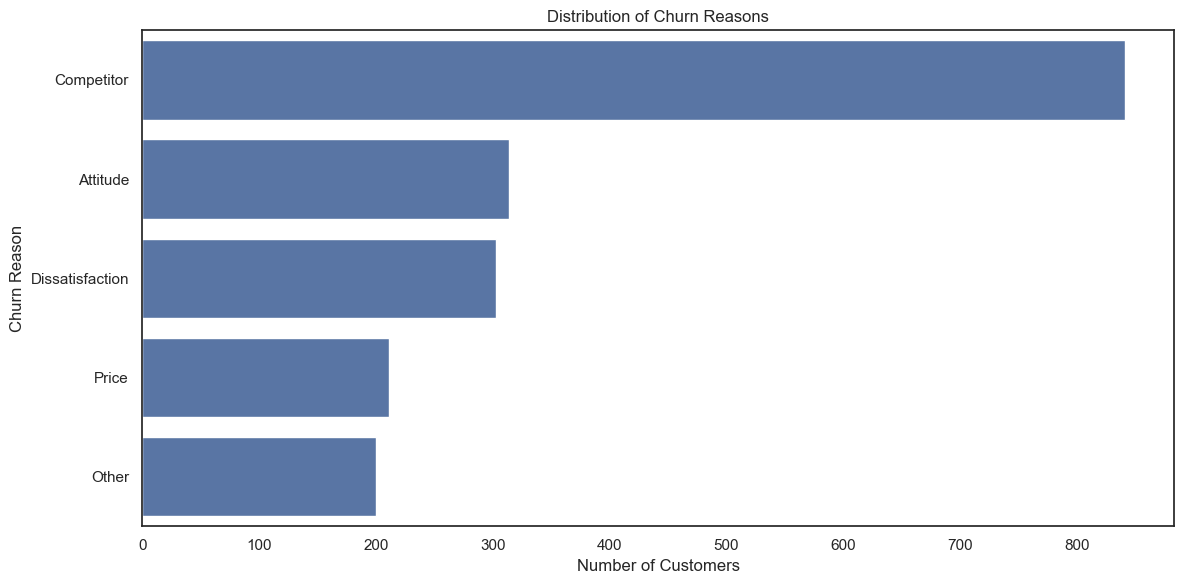

In [26]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot
sns.countplot(y='Churn Category', data=con_dat, order=con_dat['Churn Category'].value_counts().index)

# Add titles and labels
plt.title('Distribution of Churn Reasons')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
plt.tight_layout()
plt.show()

From the visualizations above, we observe that many customers churn due to issues related to fierce competitors, attitude from customer support, and dissatisfaction from product.  Since our main goal is prediction, we will drop this category as it provides a 1:1 correlation with `Churn`, but it is good to understand the dataset and underyling issues with consumers.

In [27]:
con_dat = con_dat.drop(columns=["Churn Category"])

con_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   object 
 3   Married                            7043 non-null   object 
 4   Dependents                         7043 non-null   object 
 5   Number of Dependents               7043 non-null   int64  
 6   Referred a Friend                  7043 non-null   object 
 7   Number of Referrals                7043 non-null   int64  
 8   Tenure Months                      7043 non-null   int64  
 9   Offer                              7043 non-null   object 
 10  Phone Service                      7043 non-null   object 
 11  Avg Monthly Long Distance Charges  7043 non-null   float

#### Summary Statistics

Below are the summary statistics about the dataset. These summary statistics provides a quick overview of the central tendency, spread, and distribution of numerical features. It helps identify outliers, anomalies, and potential data entry errors, such as unexpected negative values. Differences between metrics like the mean and median can reveal skewed distributions, which may require transformation before modeling. Summary statistics also allow for easy comparison between features, guiding decisions on normalization or feature scaling. Overall, this step ensures that you understand the structure and quality of your data before moving forward with analysis or modeling.

In [28]:
con_dat.describe()

,Age,Number of Dependents,Number of Referrals,Tenure Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charges,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.371149,22.958954,20.515405,64.761692,2279.734304,1.962182,6.860713,749.099262,3034.379056,0.265370
std,16.750352,0.962802,3.001199,24.559481,15.448113,20.418940,30.090047,2266.794470,7.902614,25.104978,846.660055,2865.204542,0.441561
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,21.360000,0.000000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,398.550000,0.000000,0.000000,70.545000,605.610000,0.000000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,0.000000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,1.000000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.000000


### Data Visualization

#### Distribution of Churn Population

We visualize the distribution of the churn population as it helps us understand the balance between churned and retained customers, which is crucial for building effective predictive models.  If the dataset is imbalanced (e.g., many more non-churned than churned customers), it can bias the model toward the majority class, leading to misleading accuracy and poor performance in detecting actual churn. Visualization also provides an immediate, intuitive grasp of class proportions, helps guide decisions like resampling (oversampling or undersampling), and highlights whether churn is a significant concern for the business.

<Axes: xlabel='Churn', ylabel='count'>

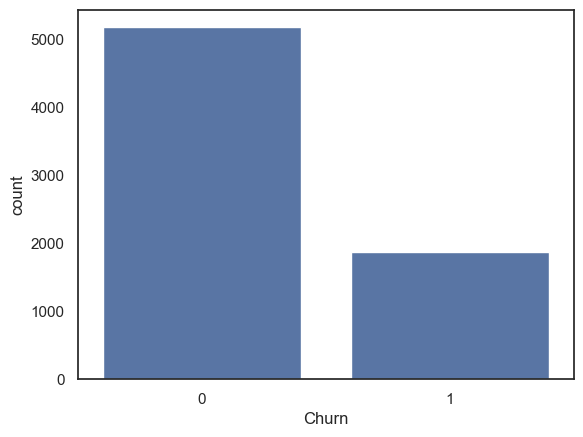

In [29]:
sns.countplot(x='Churn', data=con_dat)

From the graph above, we see that there appears some class imbalance in the dataset.  Since we observe class imbalance in the dataset, we need to take steps to ensure our model doesn't become biased toward the majority class. This imbalance can lead to misleading accuracy and poor performance in identifying actual churners. To address this, we can apply resampling techniques such as oversampling the minority class or undersampling the majority class. Additionally, we should use evaluation metrics like precision, recall, F1-score, and AUC rather than relying solely on accuracy. These steps will help create a more balanced and reliable churn prediction model.

#### Distribution of Numerical Features

We will now visualize the distribution of the numerical features in our dataset, first we will visualize the distributions and then generate a correlation matrix heatmap to visualize for multicollinearity.

#### Feature Engineer Customer Score Before Dropping

In [30]:
demog = ['Gender','Age','Married','Number of Dependents','Dependents','Number of Referrals','Referred a Friend']
serv = ['Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']
serv2 = ['Contract','Paperless Billing','Payment Method','Offer']
value = ['Tenure Months','Total Charges','Monthly Charges','Total Extra Data Charges','Total Long Distance Charges','Total Refunds','Total Revenue'] 

In [31]:
map_serv = {'Yes':1,'No':0,'No phone service':0,'DSL':1,'Fiber optic':1,'No internet service':0} 
con_dat['Services_Usage'] = pd.DataFrame([con_dat[i].map(map_serv) for i in serv ]).T.sum(axis=1) 
con_dat['Cust_Score'] = con_dat['Services_Usage'] + con_dat['Number of Referrals'] + (con_dat['Total Revenue'] /1000).round(2)

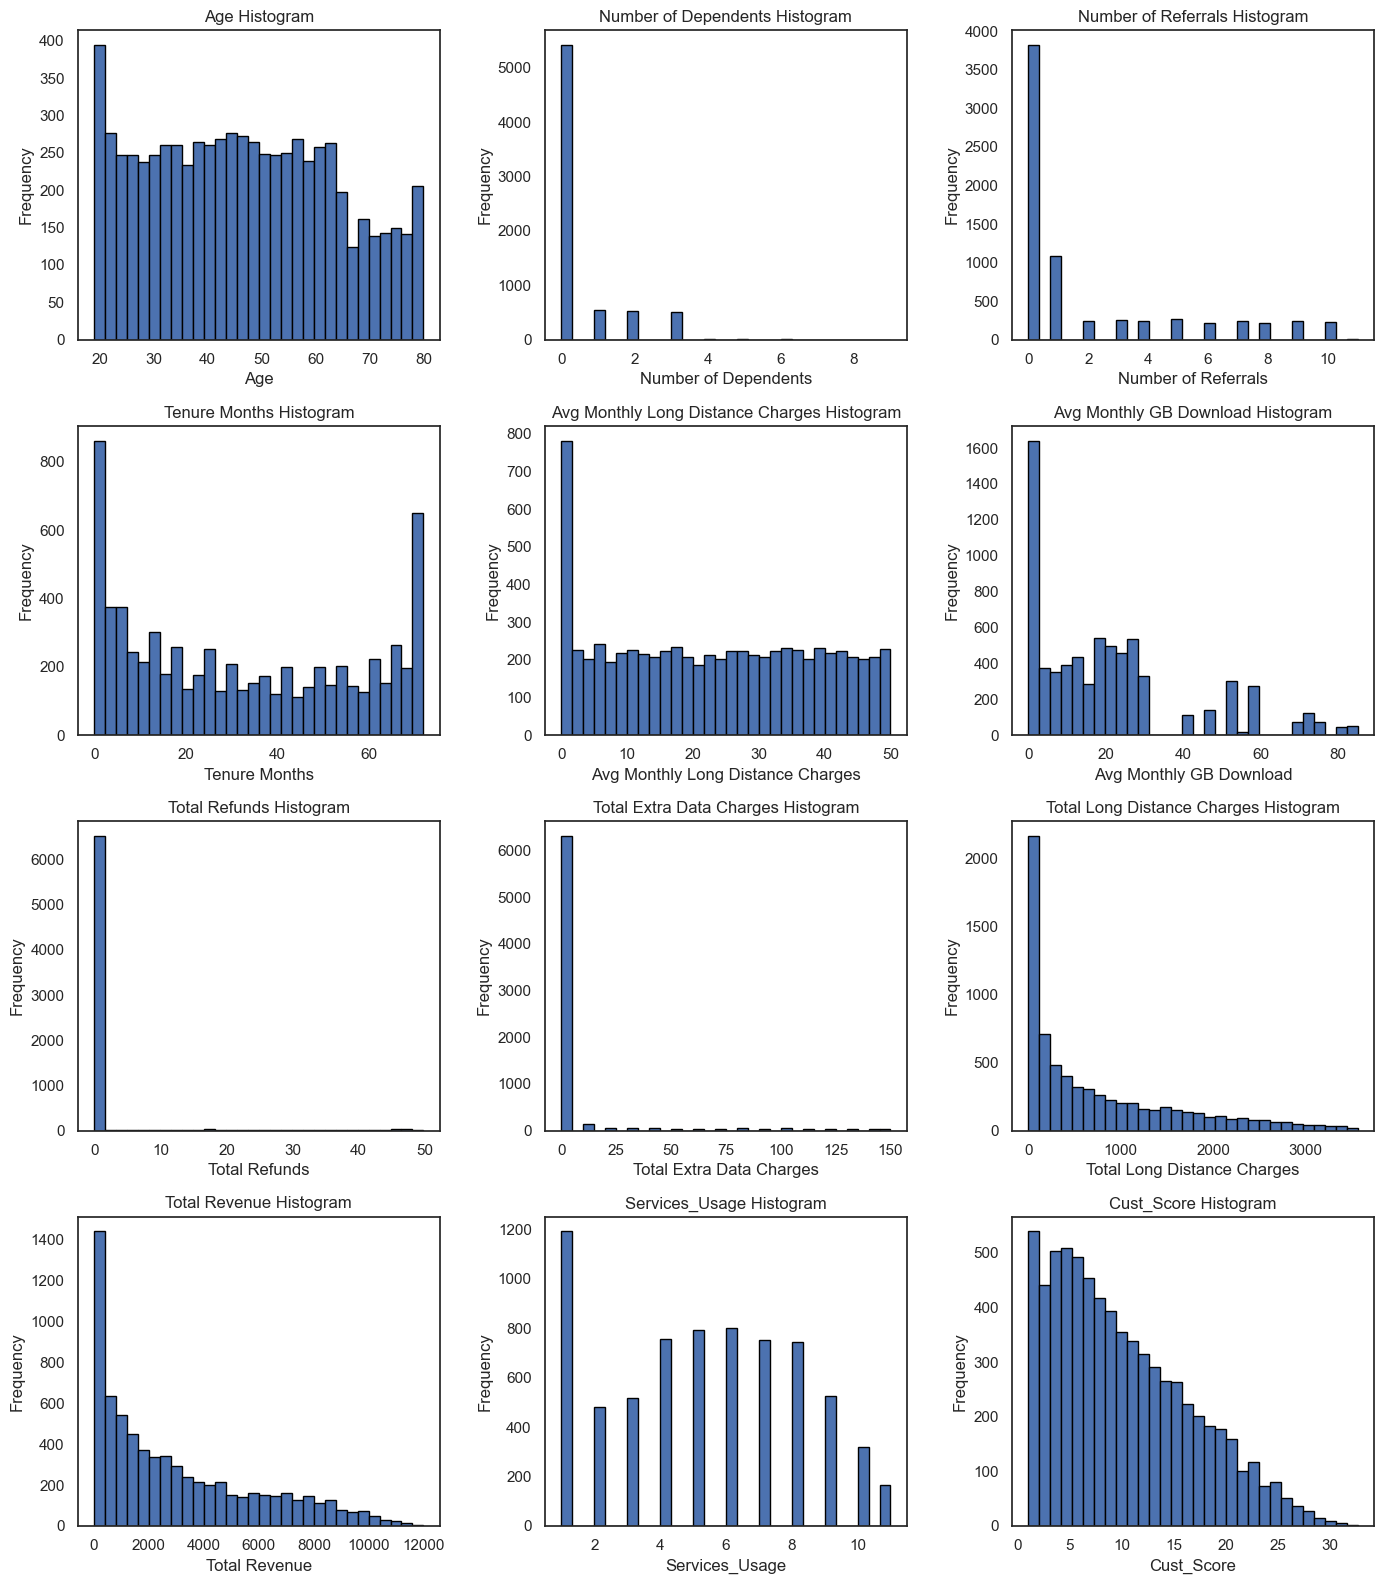

In [32]:
# --- NUMERICAL FEATURES ---
numeric_var = [
    'Age',
    'Number of Dependents',
    'Number of Referrals',
    'Tenure Months',
    'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Total Revenue',
    'Services_Usage',
    'Cust_Score'
]

# --- HISTOGRAMS ---
import math
n = len(numeric_var)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.ravel()

for i, col in enumerate(numeric_var):
    ax = axes[i]
    ax.hist(con_dat[col].dropna(), bins=30, edgecolor='black')
    ax.set_title(f'{col} Histogram')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# remove any unused axes
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation Matrix

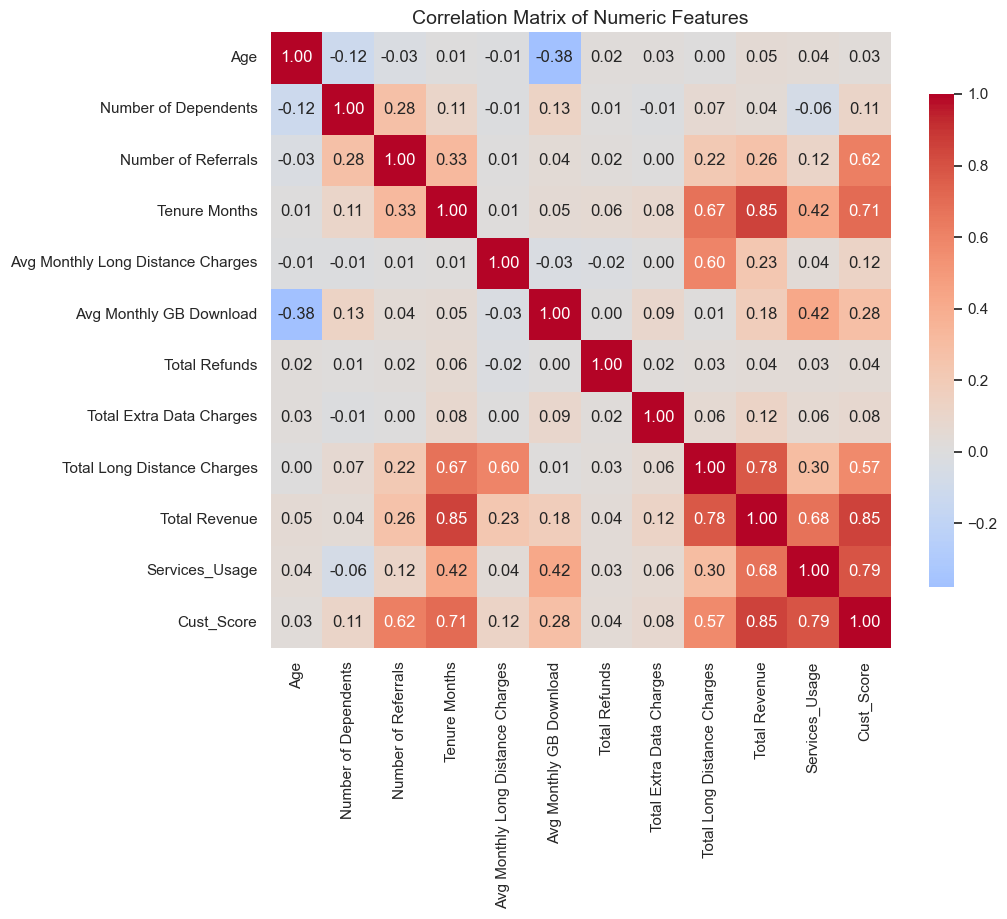

In [33]:
# --- Compute correlation matrix ---
corr_matrix = con_dat[numeric_var].corr()

# --- Plot heatmap ---
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f", cmap="coolwarm", center=0,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()

From the graphs generated above, we see a lot of right-skewed distributions for many of the numerical features, with many of them peaking at **0**.  This might indicate that some of these features might not hold much predictive power.

Additionally, from the correlation heatmap generated, we see that some features as `Total Revenue`, `Tenure Months`, and `Total Long Distance Charges` are highly correlated with one another.  This can raise issues of multicollinearity and affect our model if we do decide to go with a regression based model, we will visualize the **VIF** or variance inflation factor to quantify whether there is a problem.  Usually **VIF > 10** is considered problematic.

We see that **VIF > 10** for 2 features, `Tenure Months` and `Total Revenue`.  Since `Total Revenue` seems to be an aggregate of `Tenure Months` where `Total Revenue` seems to be a combination of money earned vs time, we will drop this feature and move forward after re-checking VIF after dropping.

Here the Vif is looking a lot better

#### Catgegorical Features Visualization

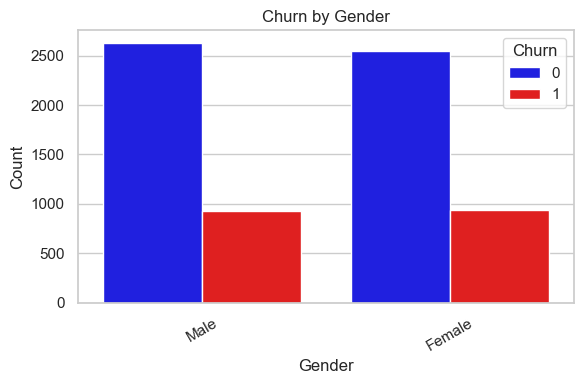

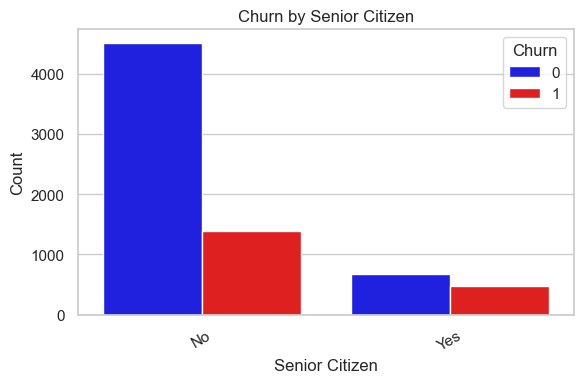

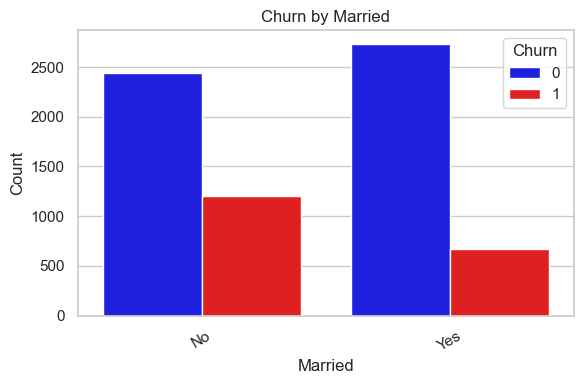

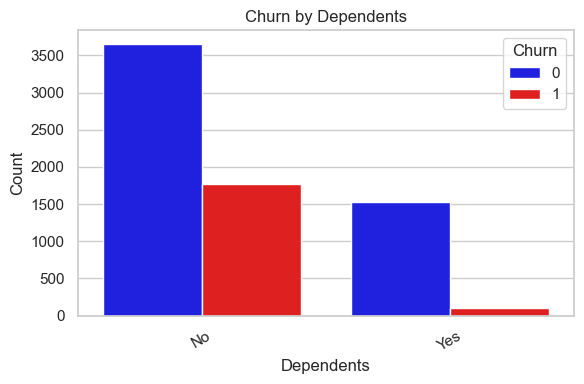

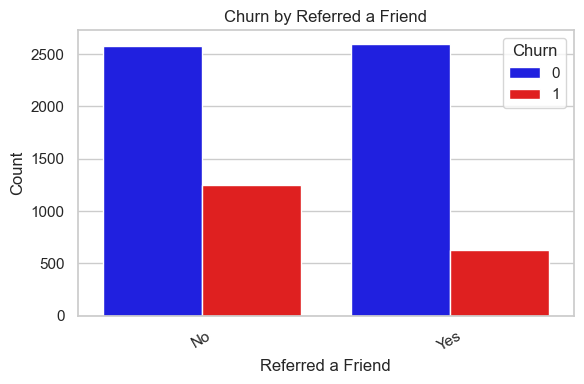

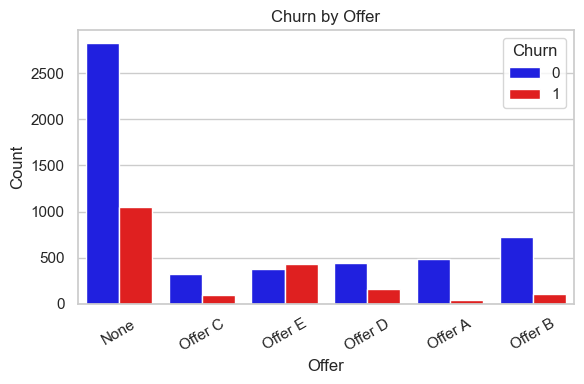

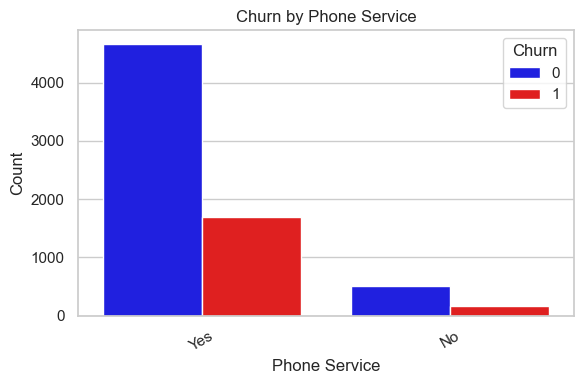

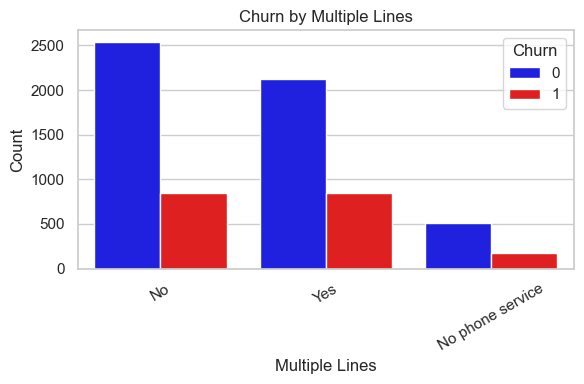

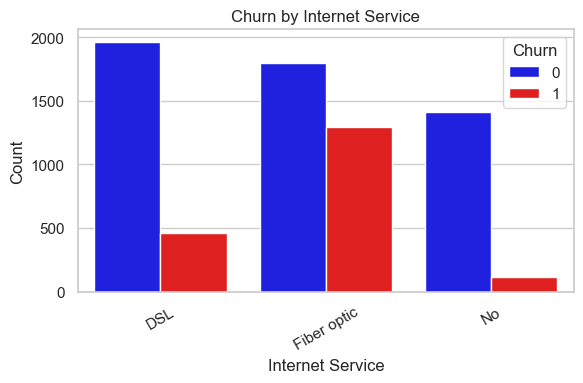

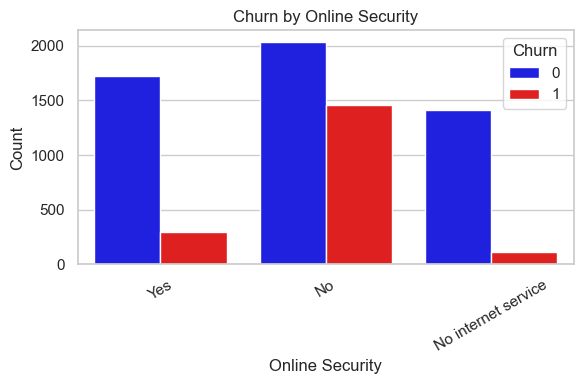

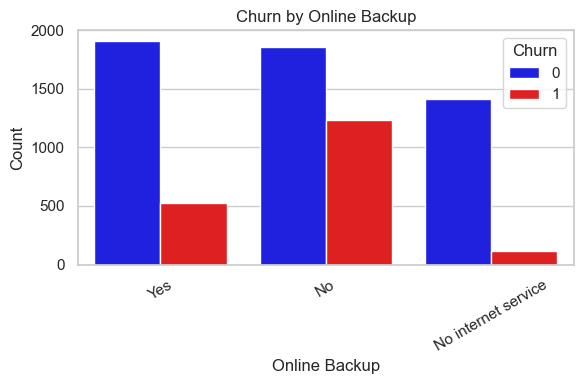

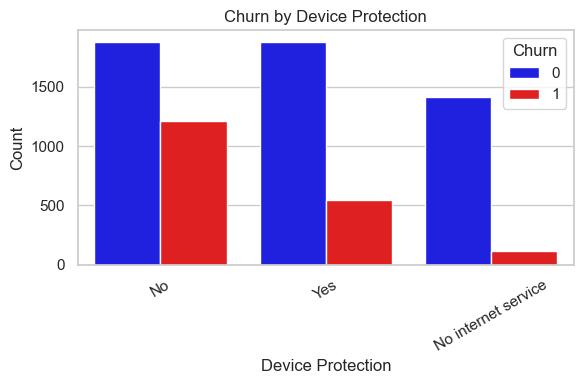

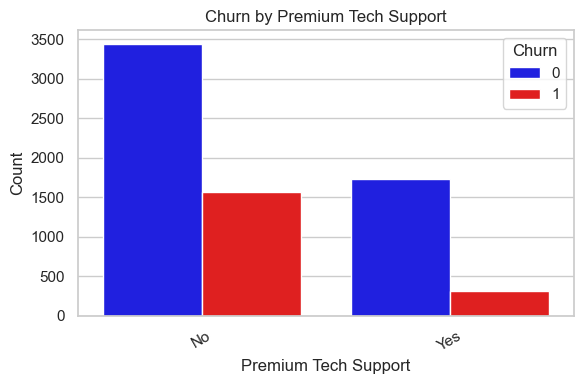

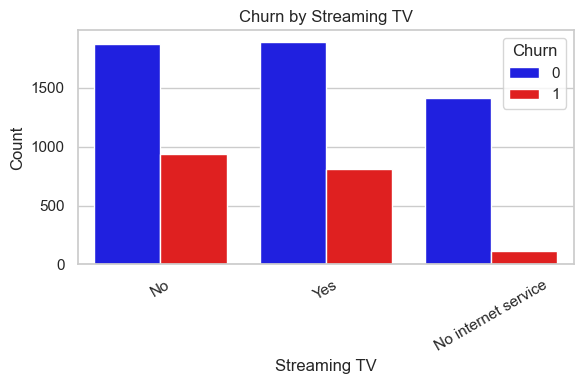

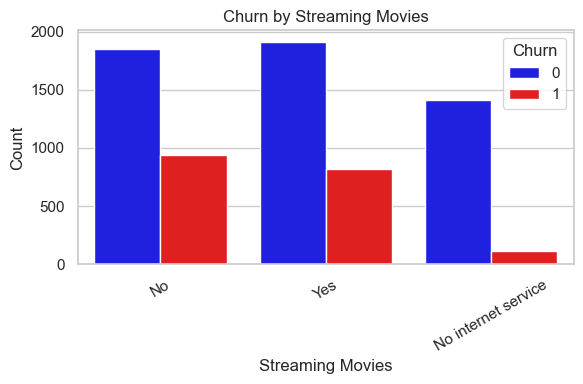

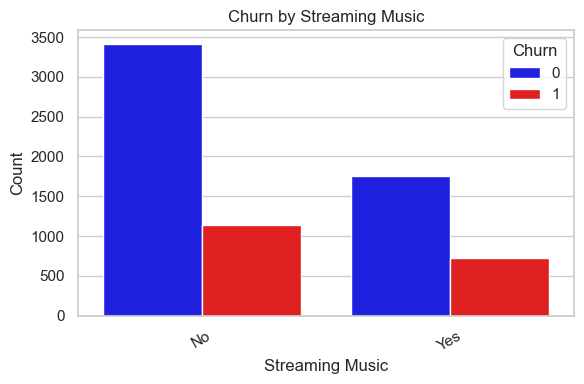

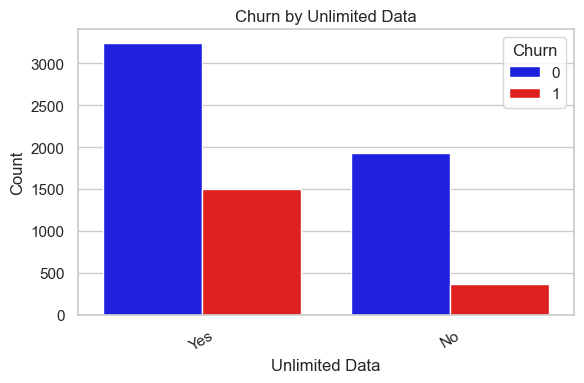

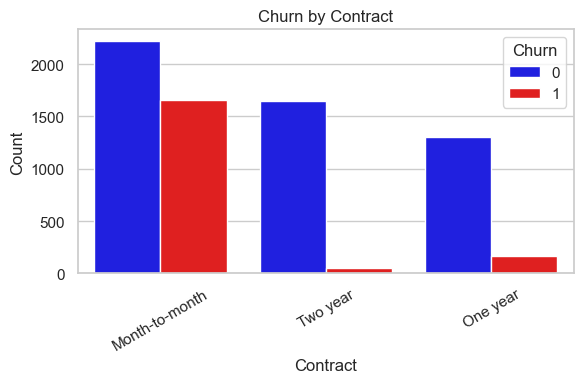

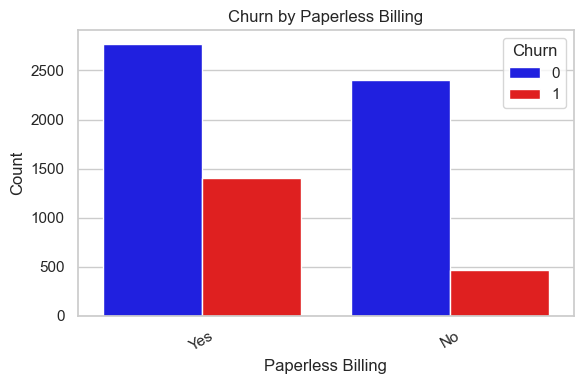

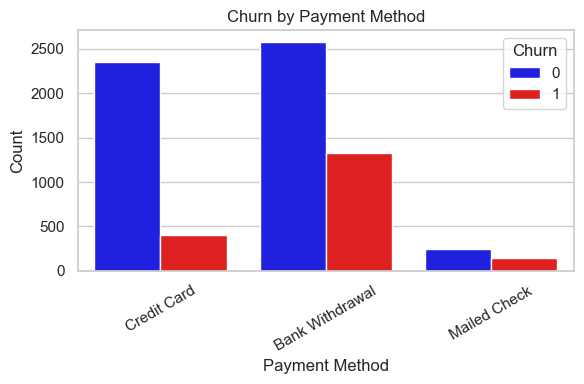

In [34]:
categoric_var = [
    'Gender', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music',
    'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method'
]

# Set global plot style
sns.set(style="whitegrid")

# Plot each categorical variable vs Churn
for col in categoric_var:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=con_dat, x=col, hue='Churn',
                  palette={0: 'blue', 1: 'red'})
    plt.title(f'Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

Above, we can sort of see some valuable information, like positive correlation between features such as `Phone Service`, `Dependents`, `Partner`, `Senior Citizen`, `Multiple Lines`, `Online Security`, `Online Backup`, `Device Protection`, `Tech Support`, `Contract`, `Paperless Billing`, and `Payment Method`.  The inverse of correlation could also be said for some features as well.  In all, this could lead to some statistical associations our model could pick up.

#### Categorical Variable Correlation Matrix

In [35]:
con_dat[categoric_var].describe()

,Gender,Senior Citizen,Married,Dependents,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,6,2,3,3,3,3,3,2,3,3,2,2,3,2,3
top,Male,No,No,No,No,None,Yes,No,Fiber optic,No,No,No,No,No,No,No,Yes,Month-to-month,Yes,Bank Withdrawal
freq,3555,5901,3641,5416,3821,3877,6361,3390,3096,3498,3088,3095,4999,2810,2785,4555,4745,3875,4171,3909


Below we will generate a Cramer's V correlation matrix for categorical variables:

Cramér’s V is a statistical measure used to describe the strength of association between two categorical variables. Unlike Pearson’s correlation, which applies to numeric data, Cramér’s V is specifically designed for categorical–categorical relationships and is derived from the chi-squared test of independence. The value of Cramér’s V ranges between 0 and 1, where 0 indicates no association and 1 represents a perfect association. Because it is symmetric, the relationship between variable A and variable B is the same as that between B and A. In practice, lower values (close to 0) suggest a weak association, while higher values (closer to 1) suggest stronger associations. For example, in a churn analysis, variables like contract type or payment method may show higher Cramér’s V values with churn, highlighting their importance in explaining customer behavior.

In [36]:
from scipy.stats import chi2_contingency

main_color = ['#1f77b4', '#ff7f0e']  # Not Churn, Churn
cmp = 'Spectral'  # for seaborn heatmaps

# Function to compute Cramer's V
def cramers_v(confusion_matrix):
    """Bias-corrected Cramér's V (Bergsma & Wicher, 2013)."""
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    if n <= 1:
        return 0.0
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    if n == 1 or (n - 1) == 0:
        return 0.0
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return 0.0
    return float(np.sqrt(phi2corr / denom))

def get_corr_mat(df_cat):
    """Return full pairwise Cramér's V matrix for categorical df (including 'Churn')."""
    cols = list(df_cat.columns)
    n = len(cols)
    dm = pd.DataFrame(np.eye(n), index=cols, columns=cols)  # 1s on diagonal
    for a, b in combinations(cols, 2):
        cont = pd.crosstab(df_cat[a], df_cat[b], margins=False).values
        v = cramers_v(cont)
        dm.loc[a, b] = v
        dm.loc[b, a] = v
    return dm

    
# ----------------- compact “vs Churn only” matrix -----------------
def get_churn_assoc(df, categoric_var, churn_col='Churn'):
    """Return a 1-column DataFrame of Cramér's V vs churn for each categorical variable."""
    vals = []
    for col in categoric_var:
        cont = pd.crosstab(df[col], df[churn_col], margins=False).values
        vals.append(cramers_v(cont))
    return pd.DataFrame({churn_col: vals}, index=categoric_var)

# ----------------- your bar + heatmap viz (safer counting / % calc) -----------------
def cat_viz(list_of_var, df, churn_col='Churn'):
    # Build grouped counts using .size() (safe vs .count on a nullable column)
    bucket1, bucket2, bucket3, bucket4, bucket5 = [], [], [], [], []

    # optional: force explicit ordering of churn bars
    if df[churn_col].dtype != 'object':
        churn_order = [0, 1]
        churn_label = {0: 'Not Churn', 1: 'Churn'}
    else:
        churn_order = ['Not Churn', 'Churn']
        churn_label = {'Not Churn': 'Not Churn', 'Churn': 'Churn'}

    for var in list_of_var:
        # counts per (churn, category)
        g = df.groupby([churn_col, var]).size().reset_index(name='Count')
        # ensure both churn levels present
        # (optional) cast churn to categoricals for stable order
        g[churn_col] = g[churn_col].map(churn_label).astype('category')
        g[churn_col] = g[churn_col].cat.set_categories(['Not Churn', 'Churn'], ordered=True)

        # split into churn==1 and churn==0 counts aligned by categories
        # build a full index over categories to align both churn subsets
        cats = g[var].unique().tolist()

        g0 = g[g[churn_col] == 'Not Churn'].set_index(var).reindex(cats).fillna({'Count': 0})
        g1 = g[g[churn_col] == 'Churn'].set_index(var).reindex(cats).fillna({'Count': 0})

        # push into buckets in consistent order
        bucket1 += [var] * len(cats)
        bucket2 += cats
        bucket4 += g0['Count'].astype(int).tolist()  # Not Churn
        bucket3 += g1['Count'].astype(int).tolist()  # Churn

        # compute % within (Not Churn vs Churn) per category (i = not churn, j = churn)
        for i_cnt, j_cnt in zip(g0['Count'].tolist(), g1['Count'].tolist()):
            denom = i_cnt + j_cnt
            if denom == 0:
                bucket5.append([0.0, 0.0])
            else:
                bucket5.append([round(i_cnt/denom*100, 2), round(j_cnt/denom*100, 2)])

    # Build stacked bars
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=[bucket1, bucket2],
        y=bucket4,
        marker_color=main_color[0],
        name="Not Churn",
        text=[f"{j}<br>%{i[0]}" for i, j in zip(bucket5, bucket4)],
        hovertemplate="Var=%{x[0]}<br>Cat=%{x[1]}<br>Not Churn=%{y}<br>%=%{text}<extra></extra>"
    ))
    fig.add_trace(go.Bar(
        x=[bucket1, bucket2],
        y=bucket3,
        marker_color=main_color[1],
        name="Churn",
        text=[f"{j}<br>%{i[1]}" for i, j in zip(bucket5, bucket3)],
        hovertemplate="Var=%{x[0]}<br>Cat=%{x[1]}<br>Churn=%{y}<br>%=%{text}<extra></extra>"
    ))
    fig.update_layout(
        title_text="Demographics Categorical Data vs Churn",
        title_x=0.5, title_y=0.97,
        template='plotly_white',
        barmode='stack',
        xaxis_title=None, yaxis_title='Count'
    )

    # Full pairwise Cramér's V (vars + churn)
    cat_corr = get_corr_mat(df[list_of_var + [churn_col]])
    plt.figure(figsize=(min(1.2*len(cat_corr), 16), min(1.2*len(cat_corr), 16)))
    sns.heatmap(cat_corr, cbar=True, annot=True, fmt='.2f', square=True, annot_kws={'size': 10}, cmap=cmp)
    plt.title("Categorical Associations (Cramér's V)")
    plt.tight_layout()
    plt.show()

    return fig  # Plotly figure (bars)

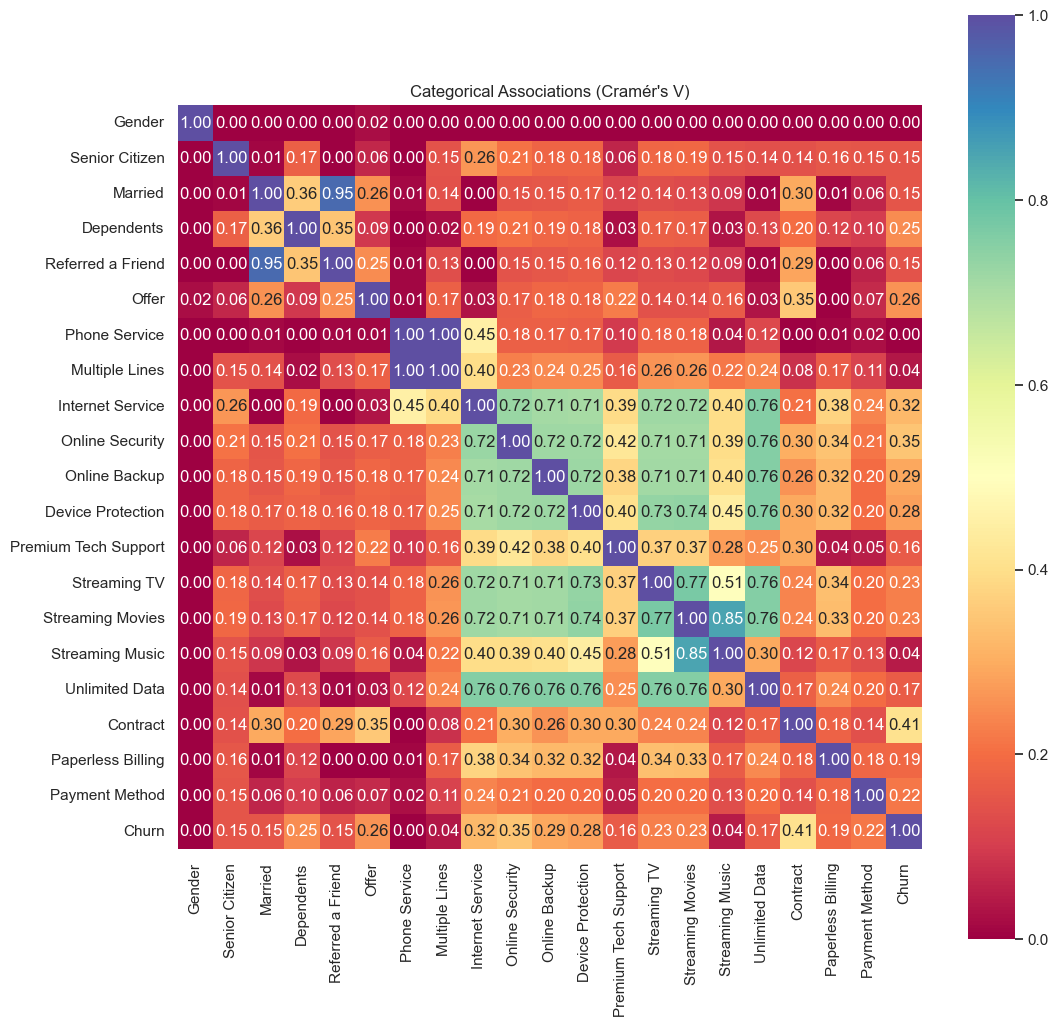

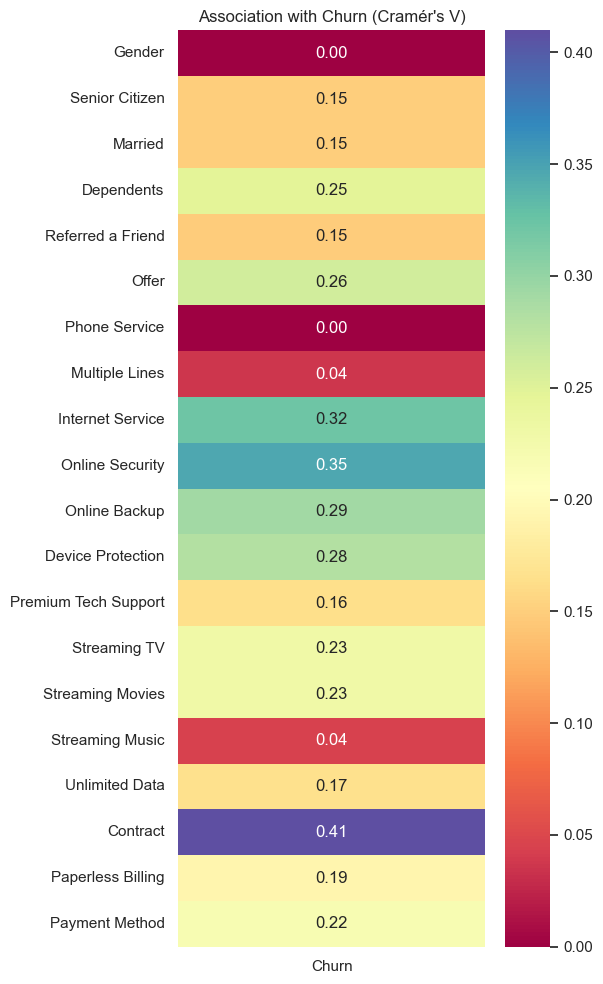

In [37]:
# 1) FULL pairwise heatmap (all categorical + Churn)
cat_corr = get_corr_mat(df[categoric_var + ['Churn']])
plt.figure(figsize=(12, 12))
sns.heatmap(cat_corr, cbar=True, annot=True, fmt='.2f', square=True, cmap=cmp)
plt.title("Categorical Associations (Cramér's V)")
plt.show()

# 2) ONE-COLUMN “vs Churn” heatmap
one_col = get_churn_assoc(df, categoric_var, churn_col='Churn')
plt.figure(figsize=(6, 10))
sns.heatmap(one_col, annot=True, fmt='.2f', cmap=cmp, cbar=True)
plt.title("Association with Churn (Cramér's V)")
plt.tight_layout()
plt.show()

In the pairwise, we see some features with high correlation: e.g. `Married` vs. `Referred a Friend` and `Streaming Movie` vs. `Streaming Music`.  However, since these are not aggregates and our main goal is prediction, we will keep these varaibles and move forward with it.  The 2nd pairwise created also further reinforces this idea.

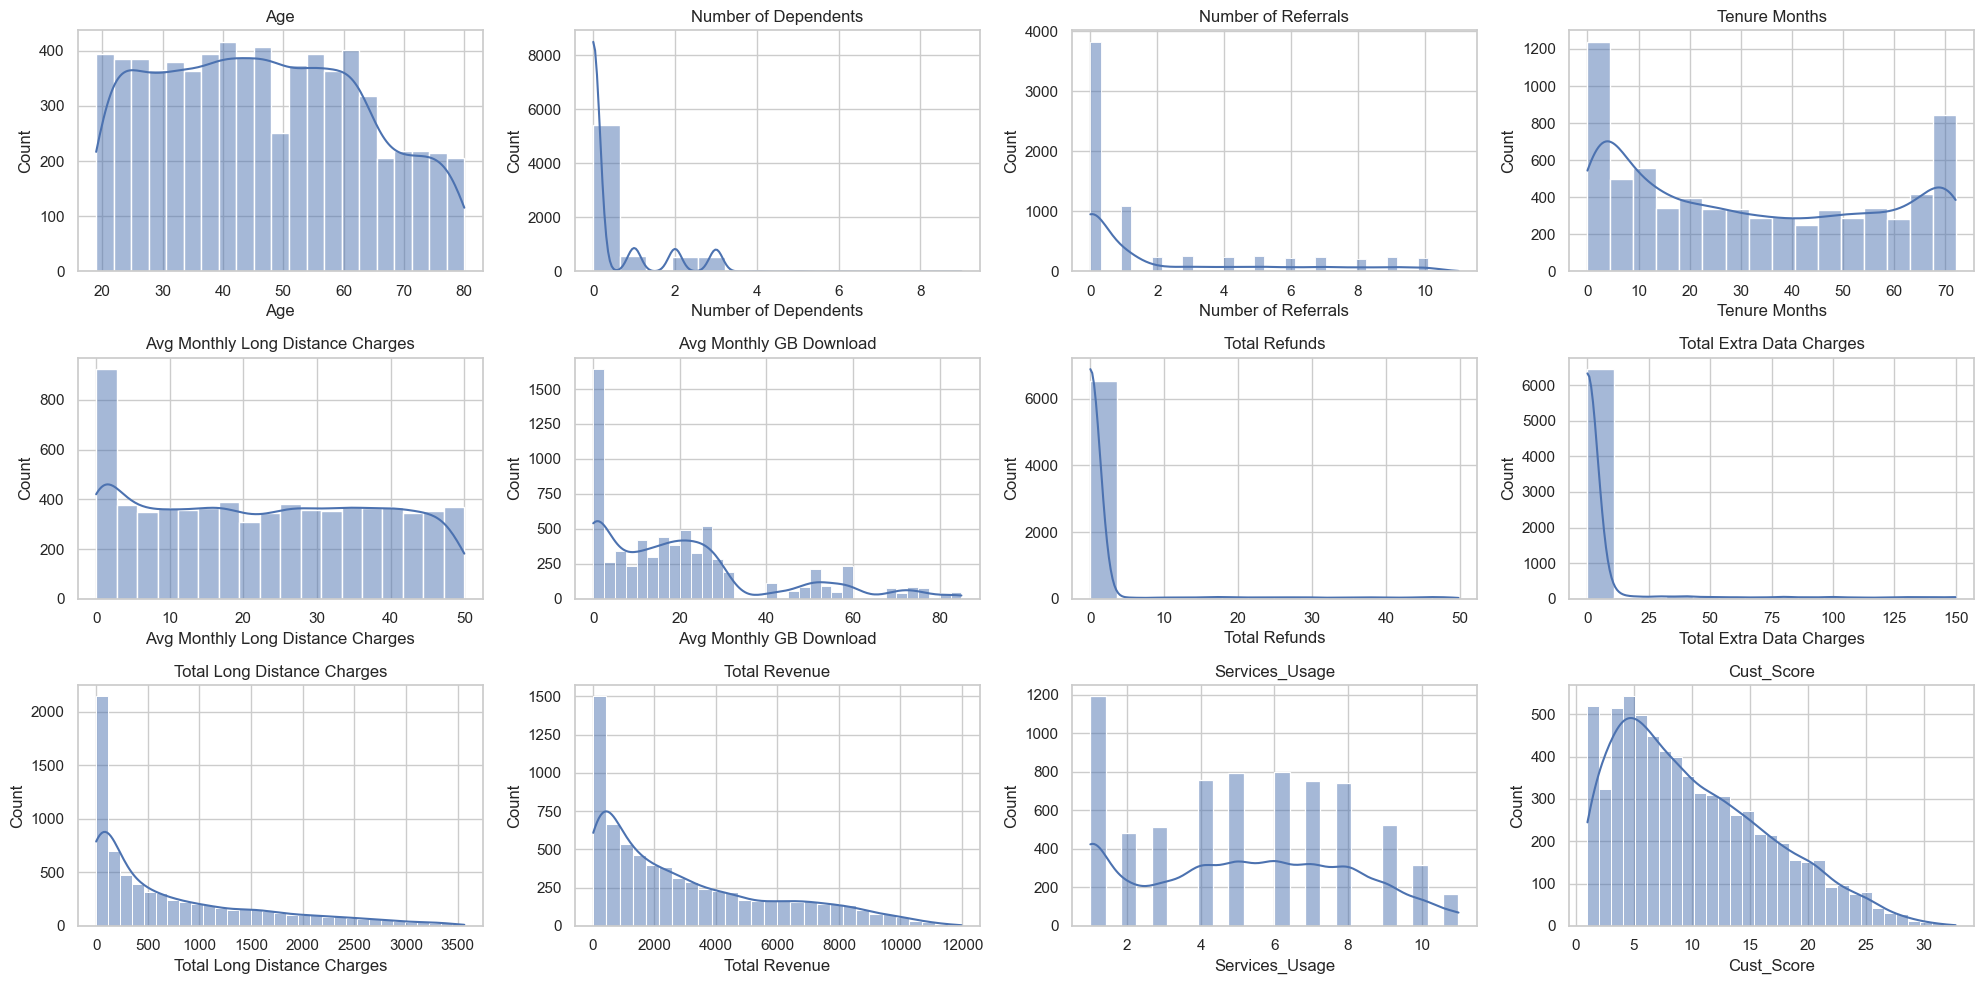

,Numeric Var,Skewness,Shapiro P-val,Conclusion,Outlier Count,Outlier %
0,Avg Monthly Long Distance Charges,0.049,0.0,Tidak Normal,0,0.00
1,Services_Usage,0.066,0.0,Tidak Normal,0,0.00
2,Age,0.162,0.0,Tidak Normal,0,0.00
3,Tenure Months,0.240,0.0,Tidak Normal,0,0.00
4,Cust_Score,0.686,0.0,Tidak Normal,20,0.28
5,Total Revenue,0.919,0.0,Tidak Normal,21,0.30
6,Avg Monthly GB Download,1.217,0.0,Tidak Normal,362,5.14
7,Total Long Distance Charges,1.238,0.0,Tidak Normal,196,2.78
8,Number of Referrals,1.446,0.0,Tidak Normal,676,9.60
9,Number of Dependents,2.110,0.0,Tidak Normal,1627,23.10


,Age,Number of Dependents,Number of Referrals,Tenure Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Services_Usage,Cust_Score
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.371149,22.958954,20.515405,1.962182,6.860713,749.099262,3034.379056,5.173222,10.159460
std,16.750352,0.962802,3.001199,24.559481,15.448113,20.418940,7.902614,25.104978,846.660055,2865.204542,2.889341,6.579006
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.360000,1.000000,1.020000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,0.000000,0.000000,70.545000,605.610000,3.000000,4.830000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,0.000000,0.000000,401.440000,2108.640000,5.000000,8.850000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,0.000000,0.000000,1191.100000,4801.145000,7.000000,14.630000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,49.790000,150.000000,3564.720000,11979.340000,11.000000,32.690000


In [38]:
from scipy.stats import skew, shapiro

# ----- helpers -----
def find_outliers_IQR(series):
    s = pd.to_numeric(series, errors='coerce').dropna()
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5*IQR
    lower = q1 - 1.5*IQR
    outliers = s[(s < lower) | (s > upper)]
    return outliers, lower, upper

def safe_shapiro(series, max_n=4999, random_state=0):
    """
    Shapiro-Wilk has an upper limit of 5000 samples and can be slow on large n.
    We subsample up to 4999 non-null points if needed.
    """
    s = pd.to_numeric(series, errors='coerce').dropna()
    if len(s) == 0:
        return np.nan
    n = min(len(s), max_n)
    if len(s) > n:
        s = s.sample(n, random_state=random_state)
    return shapiro(s)[1]

def safe_skew(series):
    s = pd.to_numeric(series, errors='coerce').dropna()
    if len(s) == 0:
        return np.nan
    return float(skew(s, bias=False))

# ----- make sure we use the right dataframe -----
# you created columns on con_dat, so use that:
df_use = con_dat

# If some names in numeric_var don't exist in the current dataframe, keep only those that do:
numeric_var = [c for c in numeric_var if c in df_use.columns]

# ----- distribution plots (seaborn) -----
plt.figure(figsize=(20, 10))
# choose grid size based on how many variables you actually have
cols = 4
rows = int(np.ceil(len(numeric_var) / cols))

for idx, col in enumerate(numeric_var, start=1):
    plt.subplot(rows, cols, idx)
    sns.histplot(pd.to_numeric(df_use[col], errors='coerce').dropna(), kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# ----- normality + outlier summary -----
outlier_counts = []
outlier_percents = []
skews = []
pvals = []
conclusions = []

n_rows = df_use.shape[0]

for col in numeric_var:
    s = pd.to_numeric(df_use[col], errors='coerce')
    skews.append(round(safe_skew(s), 3))
    p = safe_shapiro(s)
    pvals.append(np.nan if pd.isna(p) else round(p, 5))
    conclusions.append('Normal' if (not pd.isna(p) and p >= 0.05) else 'Tidak Normal')
    out_ct = find_outliers_IQR(s)[0].shape[0]
    outlier_counts.append(out_ct)
    outlier_percents.append(round((out_ct / n_rows) * 100, 2) if n_rows else np.nan)

num_conc = pd.DataFrame({
    'Numeric Var': numeric_var,
    'Skewness': skews,
    'Shapiro P-val': pvals,
    'Conclusion': conclusions,
    'Outlier Count': outlier_counts,
    'Outlier %': outlier_percents
}).sort_values(by='Skewness', ignore_index=True)

display(num_conc, df_use[numeric_var].describe())

### Data Cleaning

**Data Cleaning** is the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and ensure reliable analysis. This involves handling missing values, correcting data types, removing duplicate or irrelevant entries, standardizing formats, and resolving inconsistencies. Clean data is essential for building accurate and trustworthy models, as poor-quality data can lead to misleading insights and reduced model performance.

We will first split the data to prevent any **data-leakage** from occuring.  **Data Leakage** is the occurence when information from outside the training dataset unintentionally influences the model during training.  This can happen when preporcessing steps like scaling, encoding, or imputing are applied before the train-test split, or when target-related information is included in the features.  Data leakage leads to overly optimistic and overfitting results during evaluation; thus not generalizing well to real-world data and performance.

### Feature Engineering



#### Data Train/Test Split Creation

We will be splitting the data into a 80/20 test split

## Baseline Model

Before applying preprocessing and utilizing a variety of different models, we will create a baseline model so we have something to compare our preprocessed complex model against.

In [39]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer, precision_score

# 0) pick the dataframe that actually has engineered columns
df_use = con_dat.copy()

# 1) (re)create engineered columns if missing
if ("Services_Usage" not in df_use.columns) or ("Cust_Score" not in df_use.columns):
    # make sure these lists exist in your notebook
    serv = [
        'Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup',
        'Device Protection','Premium Tech Support','Streaming TV','Streaming Movies',
        'Streaming Music','Unlimited Data'
    ]
    map_serv = {'Yes':1,'No':0,'No phone service':0,'DSL':1,'Fiber optic':1,'No internet service':0}
    # build Services_Usage safely (coerce to object then map)
    S = []
    for c in serv:
        vals = df_use[c].astype('object').map(map_serv)
        S.append(vals)
    df_use['Services_Usage'] = pd.DataFrame(S).T.sum(axis=1)
    # Cust_Score
    df_use['Cust_Score'] = (
        df_use['Services_Usage']
        + df_use['Number of Referrals']
        + (df_use['Total Revenue'] / 1000).round(2)
    )

# 2) target column checks
assert 'Churn' in df_use.columns, "Target 'Churn' not found in con_dat/df_use"

# 3) ensure the var lists only include columns that truly exist
#    (assumes numeric_var and categoric_var were defined earlier in your notebook)
categoric_var = [c for c in categoric_var if c != "Churn Category" and c in df_use.columns]
numeric_var   = [c for c in numeric_var   if c in df_use.columns]

# 4) build X, y
X = df_use[numeric_var + categoric_var]
y = df_use['Churn']

# 5) split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# 6) class imbalance weight for XGB
pos = int(y_train.sum())
neg = int((y_train == 0).sum())
scale_pos_weight = (neg / pos) if pos > 0 else 1.0

# 7) preprocessors
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# OneHotEncoder compatibility across sklearn versions
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe),
])

ct = ColumnTransformer([
    ("num", numeric_pipe, numeric_var),
    ("cat", cat_pipe,  categoric_var),
], remainder="drop", verbose_feature_names_out=True)

# 8) models
models = [
    ("LogReg", LogisticRegression(
        random_state=42, max_iter=5000, class_weight="balanced", solver="lbfgs"
    )),
    ("SVC", SVC(
        random_state=42, probability=True, class_weight="balanced"
    )),
    ("XGB", xgb.XGBClassifier(
        n_estimators=400, max_depth=5, learning_rate=0.08, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, random_state=42, n_jobs=-1, scale_pos_weight=scale_pos_weight, eval_metric="logloss"
    )),
    ("CatBoost", CatBoostClassifier(
        random_state=42, verbose=0, depth=6, learning_rate=0.08, iterations=400, loss_function="Logloss"
    )),
]

# 9) scoring and CV
scorers = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "recall": "recall",
    "precision": make_scorer(precision_score, zero_division=0),
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 10) cross-validate
cv_frames = []
for name, est in models:
    pipe = Pipeline([("prep", ct), ("model", est)])
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scorers, return_train_score=False)
    means = {k: float(np.mean(v)) for k, v in scores.items()}
    cv_frames.append(pd.DataFrame({"Attribute": list(means.keys()), name: list(means.values())}))

# 11) merge and display
score_before = pd.DataFrame({"Attribute": ["test_f1", "test_precision", "test_recall", "test_roc_auc"]})
for df_i in cv_frames:
    score_before = score_before.merge(df_i, on="Attribute", how="left")

score_before = score_before.set_index("Attribute").round(3)
print(score_before)

                LogReg    SVC    XGB  CatBoost
Attribute                                     
test_f1          0.679  0.680  0.659     0.655
test_precision   0.570  0.571  0.615     0.704
test_recall      0.842  0.842  0.713     0.614
test_roc_auc     0.888  0.884  0.881     0.887


The metrics we will be using to grade our model are **Precision, Recall, f1-score, and ROC-AUG**.  Below is a short write-up of what they mean:

- `Precision`: Out of all the times the model predicted a class (e.g., predicted “1”), how many were actually correct. It measures how reliable positive predictions are.

- `Recall`: Out of all the actual instances of a class (e.g., all true “1”s), how many the model successfully identified. It measures how well the model finds positives.

- `F1-score`: The harmonic mean of precision and recall. It balances the two, useful when you want a single measure of performance that accounts for both false positives and false negatives.

- `ROC-AUC` (Area Under the Receiver Operating Characteristic Curve): A measure of how well the model distinguishes between the classes overall. A score of 1 means perfect separation, 0.5 means random guessing.

### Feature Selection

We apply feature selection to reduce our model complexity

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
import plotly.graph_objects as go

# 0) Start from the same df_use, X_train, y_train as in your modeling code
#    If you don't have them in scope, run the modeling block first.
numeric_var = [c for c in numeric_var if c not in ['Total Refunds','Total Extra Data Charges']]

# 1) Coerce declared numeric columns to numeric (invalids -> NaN)
X_train_num = X_train.copy()
for c in [col for col in numeric_var if col in X_train_num.columns]:
    X_train_num[c] = pd.to_numeric(X_train_num[c], errors="coerce")

# 2) Keep only columns that are truly numeric after coercion
#    (and still present in X_train)
true_numeric = []
non_numeric_suspects = []
for c in numeric_var:
    if c in X_train_num.columns:
        # if after coercion the dtype is numeric, accept it
        if pd.api.types.is_numeric_dtype(X_train_num[c]):
            true_numeric.append(c)
        else:
            non_numeric_suspects.append(c)

# Optional: let you know if anything was filtered out
if non_numeric_suspects:
    print("Filtered from numeric_var (non-numeric content detected):", non_numeric_suspects)

# 3) Categorical columns limited to those present
true_categoric = [c for c in categoric_var if c in X_train.columns]

# 4) Build a fresh ColumnTransformer for ANOVA
numeric_pipe_anova = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

try:
    ohe_anova = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe_anova = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipe_anova = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe_anova),
])

ct_anova = ColumnTransformer([
    ("num", numeric_pipe_anova, true_numeric),
    ("cat", cat_pipe_anova,  true_categoric),
], remainder="drop", verbose_feature_names_out=True)

# 5) Fit-transform and run ANOVA
X_train_trans = ct_anova.fit_transform(X_train_num, y_train)
feature_names = ct_anova.get_feature_names_out()

selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X_train_trans, y_train)
anova_scores = selector.scores_

# Pull raw arrays from the fitted selector
anova_scores = np.asarray(selector.scores_, dtype=float)
anova_pvals  = np.asarray(selector.pvalues_, dtype=float)

# Build Series with feature names
scores_s = pd.Series(anova_scores, index=pd.Index(feature_names, name="Feature"))
pvals_s  = pd.Series(anova_pvals,  index=pd.Index(feature_names, name="Feature"))

# Clean feature names (remove ColumnTransformer prefixes)
def _clean(n): 
    return str(n).replace("num__", "").replace("cat__", "")
scores_s.index = scores_s.index.map(_clean)
pvals_s.index  = pvals_s.index.map(_clean)

# Handle NaN/Inf defensively
scores_s = scores_s.replace([np.inf, -np.inf], np.nan).fillna(0.0)
pvals_s  = pvals_s.replace([np.inf, -np.inf], np.nan)

# Helper: pretty p-value formatting
def fmt_p(x):
    if pd.isna(x):
        return "nan"
    # show very small p-values in scientific notation
    return f"{x:.3e}" if x < 1e-3 else f"{x:.4f}"

k = 10  # number to show

# Top 10 by F-score
topk_idx = scores_s.sort_values(ascending=False).head(k).index
topk_df = pd.DataFrame({
    "Feature": topk_idx,
    "F_score": scores_s.loc[topk_idx].round(3).values,
    "p_value": [fmt_p(v) for v in pvals_s.loc[topk_idx].values]
})

# Lowest 10 by F-score (including zeros). To exclude zeros, filter with scores_s > 0 first.
bottomk_idx = scores_s.sort_values(ascending=True).head(k).index
bottomk_df = pd.DataFrame({
    "Feature": bottomk_idx,
    "F_score": scores_s.loc[bottomk_idx].round(3).values,
    "p_value": [fmt_p(v) for v in pvals_s.loc[bottomk_idx].values]
})

print("Top 10 features by ANOVA (F-score) with p-values")
display(topk_df.reset_index(drop=True))

print("Lowest 10 features by ANOVA (F-score) with p-values")
display(bottomk_df.reset_index(drop=True))


Top 10 features by ANOVA (F-score) with p-values


,Feature,F_score,p_value
0,Contract_Month-to-month,1182.288,1.327e-236
1,Tenure Months,814.503,4.486e-168
2,Online Security_No,787.156,7.867e-163
3,Internet Service_Fiber optic,629.757,3.170e-132
4,Contract_Two year,596.588,1.109e-125
5,Number of Referrals,532.344,6.537e-113
6,Online Backup_No,458.203,5.180e-98
7,Dependents_No,402.098,1.279e-86
8,Dependents_Yes,402.098,1.279e-86
9,Device Protection_No,399.865,3.650e-86


Lowest 10 features by ANOVA (F-score) with p-values


,Feature,F_score,p_value
0,Offer_Offer D,0.113,0.7369
1,Gender_Female,0.380,0.5378
2,Gender_Male,0.380,0.5378
3,Offer_None,0.741,0.3893
4,Phone Service_No,1.727,0.1888
5,Multiple Lines_No phone service,1.727,0.1888
6,Phone Service_Yes,1.727,0.1888
7,Avg Monthly Long Distance Charges,2.015,0.1558
8,Services_Usage,3.280,0.0702
9,Multiple Lines_No,4.927,0.0265


Apply selected features below:

### Chi Squared Feature Selection

In [41]:
# --- Chi-square feature selection (non-negative features required) ---

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

# 0) Use the same train split and var lists; ensure numeric_var doesn't include dropped cols
#    (If you've already removed them earlier, this is redundant but harmless.)
numeric_var = [c for c in numeric_var if c not in ['Total Refunds','Total Extra Data Charges']]

# 1) Coerce declared numeric columns to numeric (invalids -> NaN)
X_train_num = X_train.copy()
for c in [col for col in numeric_var if col in X_train_num.columns]:
    X_train_num[c] = pd.to_numeric(X_train_num[c], errors="coerce")

# 2) Keep only columns that are truly numeric after coercion
true_numeric_chi = []
non_numeric_suspects = []
for c in numeric_var:
    if c in X_train_num.columns:
        if pd.api.types.is_numeric_dtype(X_train_num[c]):
            true_numeric_chi.append(c)
        else:
            non_numeric_suspects.append(c)

if non_numeric_suspects:
    print("Filtered from numeric_var for chi2 (non-numeric content detected):", non_numeric_suspects)

# 3) Categorical columns limited to those present
true_categoric_chi = [c for c in categoric_var if c in X_train.columns]

# 4) Build a ColumnTransformer for chi2
#    IMPORTANT: chi2 requires non-negative features -> use MinMaxScaler to [0,1]
numeric_pipe_chi2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("minmax", MinMaxScaler(feature_range=(0, 1))),
])

try:
    ohe_chi2 = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe_chi2 = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipe_chi2 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe_chi2),
])

ct_chi2 = ColumnTransformer([
    ("num", numeric_pipe_chi2, true_numeric_chi),
    ("cat", cat_pipe_chi2,     true_categoric_chi),
], remainder="drop", verbose_feature_names_out=True)

# 5) Fit-transform and run chi2
X_train_trans_chi2 = ct_chi2.fit_transform(X_train_num, y_train)
feature_names_chi2 = ct_chi2.get_feature_names_out()

selector_chi2 = SelectKBest(score_func=chi2, k="all")
selector_chi2.fit(X_train_trans_chi2, y_train)

chi2_scores = selector_chi2.scores_
chi2_pvals  = selector_chi2.pvalues_

# 6) Build a tidy table and show top/bottom 10
def _clean(n): 
    return str(n).replace("num__", "").replace("cat__", "")

scores_s = pd.Series(np.asarray(chi2_scores, dtype=float),
                     index=pd.Index(feature_names_chi2, name="Feature")).replace([np.inf, -np.inf], np.nan).fillna(0.0)
scores_s.index = scores_s.index.map(_clean)

pvals_s = pd.Series(np.asarray(chi2_pvals, dtype=float),
                    index=scores_s.index).replace([np.inf, -np.inf], np.nan)

k = 10  # how many to show

# Top 10
topk = scores_s.sort_values(ascending=False).head(k).round(3)
topk_df = pd.DataFrame({
    "Feature": topk.index,
    "Chi2_score": topk.values,
    "p_value": pvals_s.loc[topk.index].round(3).values
})

# Lowest 10 (including zeros). To exclude zeros, use scores_s[scores_s > 0]
bottomk = scores_s.sort_values(ascending=True).head(k).round(3)
bottomk_df = pd.DataFrame({
    "Feature": bottomk.index,
    "Chi2_score": bottomk.values,
    "p_value": pvals_s.loc[bottomk.index].round(3).values
})

print("Top 10 features by Chi-square")
display(topk_df)

print("Lowest 10 features by Chi-square")
display(bottomk_df)

Top 10 features by Chi-square


,Feature,Chi2_score,p_value
0,Contract_Month-to-month,444.454,0.0
1,Contract_Two year,411.682,0.0
2,Online Security_No,350.614,0.0
3,Internet Service_Fiber optic,320.889,0.0
4,Dependents_Yes,290.329,0.0
5,Streaming TV_No internet service,245.139,0.0
6,Streaming Movies_No internet service,245.139,0.0
7,Online Backup_No internet service,245.139,0.0
8,Internet Service_No,245.139,0.0
9,Online Security_No internet service,245.139,0.0


Lowest 10 features by Chi-square


,Feature,Chi2_score,p_value
0,Offer_Offer D,0.103,0.748
1,Phone Service_Yes,0.171,0.679
2,Gender_Male,0.188,0.665
3,Gender_Female,0.192,0.661
4,Offer_None,0.336,0.562
5,Avg Monthly Long Distance Charges,0.421,0.516
6,Services_Usage,0.662,0.416
7,Multiple Lines_No phone service,1.556,0.212
8,Phone Service_No,1.556,0.212
9,Multiple Lines_No,2.576,0.109


### Pipeline



In [43]:
def _ohe_compat():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:  # sklearn < 1.2
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# ensure lists contain only columns present in X_train
num_cols = [c for c in numeric_var if c in X_train.columns]
cat_cols = [c for c in categoric_var if c in X_train.columns]

# ---- Preprocessor for ANOVA (standard scaler ok) ----
prep_anova = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler()),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# ---- Preprocessor for Chi-square (requires non-negative -> MinMax to [0,1]) ----
prep_chi2 = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("mm", MinMaxScaler(feature_range=(0, 1))),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# ---- Estimator (swap as needed) ----
clf = LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42)

# ---- Pipelines ----
pipe_anova10 = Pipeline([
    ("prep", prep_anova),
    ("select", SelectKBest(score_func=f_classif, k=10)),
    ("model", clf),
])

pipe_chi210 = Pipeline([
    ("prep", prep_chi2),
    ("select", SelectKBest(score_func=chi2, k=10)),
    ("model", clf),
])

# ===== Fit once on the training set to inspect which features were chosen =====
pipe_anova10.fit(X_train, y_train)
pipe_chi210.fit(X_train, y_train)

# ---- Get transformed feature names from each preprocessor ----
anova_feat_names = pipe_anova10.named_steps["prep"].get_feature_names_out()
chi2_feat_names  = pipe_chi210.named_steps["prep"].get_feature_names_out()

# ---- Selected masks & names ----
anova_support = pipe_anova10.named_steps["select"].get_support()
chi2_support  = pipe_chi210.named_steps["select"].get_support()

anova_selected_names = anova_feat_names[anova_support]
chi2_selected_names  = chi2_feat_names[chi2_support]

# (Optional) nice cleanup of prefixes
def _clean(n): return str(n).replace("num__", "").replace("cat__", "")
anova_selected_clean = [_clean(n) for n in anova_selected_names]
chi2_selected_clean  = [_clean(n) for n in chi2_selected_names]

print("ANOVA top-10 selected features:")
print(anova_selected_clean)

print("\nChi-square top-10 selected features:")
print(chi2_selected_clean)

ANOVA top-10 selected features:
['Number of Referrals', 'Tenure Months', 'Dependents_No', 'Dependents_Yes', 'Internet Service_Fiber optic', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Contract_Month-to-month', 'Contract_Two year']

Chi-square top-10 selected features:
['Dependents_Yes', 'Internet Service_Fiber optic', 'Online Security_No', 'Online Security_No internet service', 'Online Backup_No internet service', 'Device Protection_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Contract_Month-to-month', 'Contract_Two year']


### Weights

In [44]:
def _ohe_compat():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:  # sklearn < 1.2
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Ensure we only use columns present in X_train
num_cols = [c for c in numeric_var if c in X_train.columns]
cat_cols = [c for c in categoric_var if c in X_train.columns]

# Preprocessor for ANOVA (numeric can be standardized)
prep_anova = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler()),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# Preprocessor for Chi-square (REQUIRES non-negative -> MinMax to [0,1])
prep_chi2 = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("mm", MinMaxScaler(feature_range=(0, 1))),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# ----------------- Models & Weights -----------------
# weights for imbalanced classes
weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: float(weights[0]), 1: float(weights[1])}  # for CatBoost (order matters)
scale_pos_weight = y_train.value_counts()[0] / max(y_train.value_counts()[1], 1)  # for XGB

models = [
    ('LogReg', LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced', solver='lbfgs')),
    ('XGB',    xgb.XGBClassifier(random_state=42, n_estimators=400, n_jobs=-1,
                                 scale_pos_weight=scale_pos_weight, eval_metric='logloss')),
    ('SVC',    SVC(random_state=42, class_weight='balanced', probability=True)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0, loss_function='Logloss',
                                    class_weights=[class_weights[0], class_weights[1]])),
]

# ----------------- Scoring & CV -----------------
scorers = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "recall": "recall",
    "precision": make_scorer(precision_score, zero_division=0),
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def run_cv_for_selector(selector_name: str, preprocessor: ColumnTransformer, score_func, k=10):
    """Build pipeline = preprocessor -> SelectKBest(score_func, k) -> model, then CV for all models."""
    frames = []
    for name, model in models:
        pipe = Pipeline([
            ("prep", preprocessor),
            ("select", SelectKBest(score_func=score_func, k=k)),
            ("model", model),
        ])
        scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scorers, return_train_score=False)
        means = {metric: float(np.mean(val)) for metric, val in scores.items()}  # test_* keys included
        frames.append(pd.DataFrame({"Attribute": list(means.keys()), name: list(means.values())}))
    # Merge into a single table
    out = pd.DataFrame({"Attribute": ["test_f1", "test_precision", "test_recall", "test_roc_auc"]})
    for f in frames:
        out = out.merge(f, on="Attribute", how="left")
    out = out.set_index("Attribute").round(3)
    out.index = out.index.str.replace("test_", "", regex=False)
    out.index.name = f"{selector_name} (k={k})"
    return out

# ----------------- Run CV -----------------
anova_cv = run_cv_for_selector("ANOVA f_classif", prep_anova, f_classif, k=10)
chi2_cv  = run_cv_for_selector("Chi-square",      prep_chi2,  chi2,      k=10)

print("=== Cross-Validation: ANOVA top-10 ===")
display(anova_cv)

print("=== Cross-Validation: Chi-square top-10 ===")
display(chi2_cv)

# Optional: side-by-side comparison (stack)
#comparison = (pd.concat(
#    {"ANOVA_k10": anova_cv, "CHI2_k10": chi2_cv},
#    axis=0
#))
#display(comparison)

=== Cross-Validation: ANOVA top-10 ===


,LogReg,XGB,SVC,CatBoost
ANOVA f_classif (k=10),,,,
f1,0.644,0.638,0.651,0.670
precision,0.524,0.551,0.533,0.566
recall,0.835,0.758,0.837,0.823
roc_auc,0.859,0.848,0.864,0.879


=== Cross-Validation: Chi-square top-10 ===


,LogReg,XGB,SVC,CatBoost
Chi-square (k=10),,,,
f1,0.622,0.622,0.622,0.621
precision,0.515,0.525,0.524,0.523
recall,0.785,0.767,0.767,0.768
roc_auc,0.829,0.829,0.793,0.829


LogReg    XGB    SVC  CatBoost
          ANOVA f_classif (k=10)                                
ANOVA_k10 f1                       0.644  0.638  0.651     0.670
          precision                0.524  0.551  0.533     0.566
          recall                   0.835  0.758  0.837     0.823
          roc_auc                  0.859  0.848  0.864     0.879
CHI2_k10  f1                       0.622  0.622  0.622     0.621
          precision                0.515  0.525  0.524     0.523
          recall                   0.785  0.767  0.767     0.768
          roc_auc                  0.829  0.829  0.793     0.829

In [45]:
print(score_before)

                LogReg    SVC    XGB  CatBoost
Attribute                                     
test_f1          0.679  0.680  0.659     0.655
test_precision   0.570  0.571  0.615     0.704
test_recall      0.842  0.842  0.713     0.614
test_roc_auc     0.888  0.884  0.881     0.887


### Smote

In [46]:
# samplers
try:
    smote_enn  # if you already created one earlier, reuse it
except NameError:
    from imblearn.combine import SMOTEENN
    smote_enn = SMOTEENN(random_state=42)

# --- helpers ---
def _ohe_compat():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:  # sklearn < 1.2
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# ensure we only use columns present in X_train
num_cols = [c for c in numeric_var if c in X_train.columns]
cat_cols = [c for c in categoric_var if c in X_train.columns]

# preprocessors
prep_anova = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler()),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# chi2 requires non-negative features
prep_chi2 = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("mm", MinMaxScaler((0, 1))),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# scoring & CV
scorers = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "recall": "recall",
    "precision": make_scorer(precision_score, zero_division=0),
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# if your models_smote list is not defined, define it here. Otherwise we use your existing one.
try:
    models_smote
except NameError:
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC
    import xgboost as xgb
    from catboost import CatBoostClassifier
    models_smote = [
        ['LogReg', LogisticRegression(random_state=42, max_iter=1000, verbose=0)],
        ['XGB',    xgb.XGBClassifier(random_state=42, eval_metric='logloss')],
        ['SVC',    SVC(random_state=42, verbose=0, probability=True)],
        ['CatBoost', CatBoostClassifier(random_state=42, verbose=0, loss_function='Logloss')],
    ]

def run_cv_smote(selector_name: str, preprocessor: ColumnTransformer, score_func, k=10):
    frames = []
    for name, est in models_smote:
        # Pipeline order: preprocess -> SMOTE/ENN -> select top-k -> model
        # (selection after resampling to avoid selection bias from class imbalance)
        pipe = imbpipeline(steps=[
            ("prep", preprocessor),
            ("smote", smote_enn),
            ("select", SelectKBest(score_func=score_func, k=k)),
            ("model", est),
        ])
        scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scorers, return_train_score=False)
        means = {k: float(np.mean(v)) for k, v in scores.items()}
        frames.append(pd.DataFrame({"Attribute": list(means.keys()), name: list(means.values())}))
    out = pd.DataFrame({"Attribute": ["test_f1", "test_precision", "test_recall", "test_roc_auc"]})
    for f in frames:
        out = out.merge(f, on="Attribute", how="left")
    out = out.set_index("Attribute").round(3)
    out.index = out.index.str.replace("test_", "", regex=False)
    out.index.name = f"{selector_name} (k=10) + SMOTEENN"
    return out

# ---- run CV ----
score_smote_anova = run_cv_smote("ANOVA", preprocessor=prep_anova, score_func=f_classif, k=10)
score_smote_chi2  = run_cv_smote("Chi2",  preprocessor=prep_chi2,  score_func=chi2,      k=10)

print("=== SMOTE + ANOVA top-10 (10-fold CV) ===")
display(score_smote_anova)

print("=== SMOTE + Chi-square top-10 (10-fold CV) ===")
display(score_smote_chi2)

=== SMOTE + ANOVA top-10 (10-fold CV) ===


,LogReg,XGB,SVC,CatBoost
ANOVA (k=10) + SMOTEENN,,,,
f1,0.619,0.659,0.627,0.657
precision,0.472,0.537,0.479,0.532
recall,0.902,0.856,0.908,0.860
roc_auc,0.856,0.870,0.851,0.876


=== SMOTE + Chi-square top-10 (10-fold CV) ===


,LogReg,XGB,SVC,CatBoost
Chi2 (k=10) + SMOTEENN,,,,
f1,0.591,0.613,0.602,0.613
precision,0.447,0.498,0.474,0.498
recall,0.871,0.800,0.826,0.800
roc_auc,0.813,0.815,0.774,0.815


In [47]:
print(score_before)

                LogReg    SVC    XGB  CatBoost
Attribute                                     
test_f1          0.679  0.680  0.659     0.655
test_precision   0.570  0.571  0.615     0.704
test_recall      0.842  0.842  0.713     0.614
test_roc_auc     0.888  0.884  0.881     0.887


In [49]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

for candidate in ['notebook_connected', 'vscode', 'jupyterlab', 'colab', 'browser']:
    try:
        pio.renderers.default = candidate
        break
    except Exception:
        pass

# --- helper: normalize score table shape ---
def _normalize_scores(df):
    """
    Expects df.index = ['f1','precision','recall','roc_auc'] (order doesn’t matter),
    df.columns = model names (e.g., LogReg, XGB, SVC, CatBoost).
    Returns tidy long dataframe with columns: Model, Metrics, Score.
    """
    # copy and harmonize
    d = df.copy()
    # Lower-case to match keys regardless of capitalization, then map to display names
    rename_map = {
        'f1': 'F1',
        'precision': 'Precision',
        'recall': 'Recall',
        'roc_auc': 'ROC-AUC',
    }
    # Try to align: accept existing names or remove "test_" if still present
    idx = pd.Index([str(i).replace('test_', '') for i in d.index], name='metric')
    d.index = idx

    # filter to the 4 metrics we care about (if present)
    keep = [m for m in ['f1', 'precision', 'recall', 'roc_auc'] if m in d.index]
    d = d.loc[keep]

    # build long form
    d_long = d.reset_index().melt(id_vars='metric', var_name='Model', value_name='Score')
    d_long['Metrics'] = d_long['metric'].map(rename_map)
    d_long = d_long.drop(columns=['metric'])

    # order Metrics consistently
    order = ['ROC-AUC', 'F1', 'Recall', 'Precision']
    d_long['Metrics'] = pd.Categorical(d_long['Metrics'], categories=order, ordered=True)
    d_long = d_long.sort_values(['Model', 'Metrics']).reset_index(drop=True)
    return d_long

# --- main plotting function ---
def plot_before_after(score_before_df, score_after_df,
                      title_before='Before', title_after='After',
                      slope_metrics=('ROC-AUC', 'F1', 'Recall', 'Precision')):
    """
    score_before_df / score_after_df: tables like anova_cv / chi2_cv / your score_* tables
    """
    color_discrete_map = {'ROC-AUC':'#10A19D','F1':'#540375','Recall':'#FF7000','Precision':'#FFBF00'}

    # 1) Grouped bar charts (Plotly)
    sb = _normalize_scores(score_before_df)
    sa = _normalize_scores(score_after_df)

    fig_before = px.histogram(
        sb, x="Model", y="Score", color="Metrics", barmode="group",
        text_auto=True, color_discrete_map=color_discrete_map, height=450,
        title=title_before
    ).update_layout(margin=dict(l=10,r=10,b=10,t=50,pad=0), template='plotly_white')
    fig_after = px.histogram(
        sa, x="Model", y="Score", color="Metrics", barmode="group",
        text_auto=True, color_discrete_map=color_discrete_map, height=450,
        title=title_after
    ).update_layout(margin=dict(l=10,r=10,b=10,t=50,pad=0), template='plotly_white')

    fig_before.show()
    fig_after.show()

    # 2) Slope charts (Matplotlib): each metric shows before→after lines per model
    # Merge to a single table with Status flag 0/1
    bf = sb.pivot(index='Model', columns='Metrics', values='Score')
    af = sa.pivot(index='Model', columns='Metrics', values='Score')
    models = sorted(set(bf.index).intersection(af.index))

    # color palette per model (repeat if more than 4)
    model_colors = ['#10A19D', '#540375', '#FF7000', '#FFBF00', '#1f77b4', '#9467bd', '#8c564b', '#e377c2']

    for metric in slope_metrics:
        if (metric not in bf.columns) or (metric not in af.columns):
            continue
        fig, ax = plt.subplots(1, figsize=(8,5), facecolor='w')
        ax.set_facecolor('w')
        for idx, m in enumerate(models):
            c = model_colors[idx % len(model_colors)]
            y0 = bf.loc[m, metric]
            y1 = af.loc[m, metric]
            plt.plot([0,1], [y0, y1], marker='o', markersize=5, lw=3.5, color=c, label=m if idx==0 else None)
            plt.text(-0.05, y0, m, ha='right', va='center', fontsize=9)
            plt.text(1.05, y1, m, ha='left', va='center', fontsize=9)
        ax.set_xticks([0,1], ['Before','After'])
        plt.xlim(-0.4, 1.4)
        plt.title(f'{metric} Score', fontsize=15)
        # grid + clean spines
        ax.xaxis.grid(color='black', linestyle='solid', alpha=0.2)
        for spine in ['right','left','bottom','top']:
            ax.spines[spine].set_visible(False)
        # one legend entry (models labeled on lines already)
        plt.show()

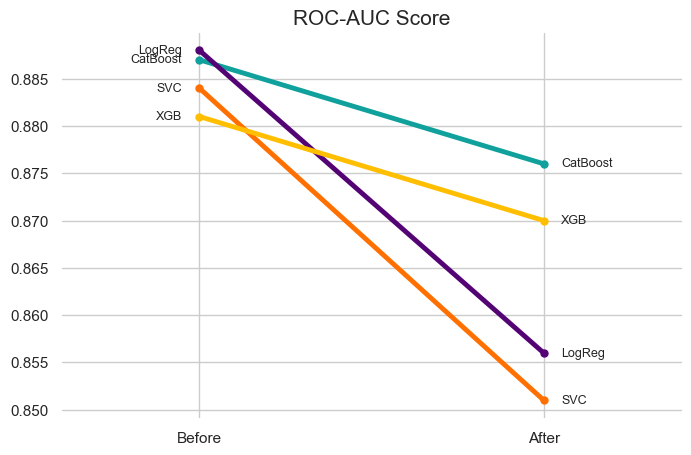

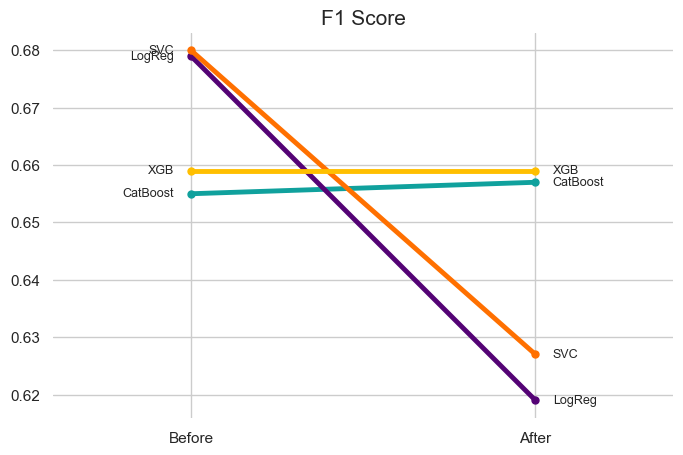

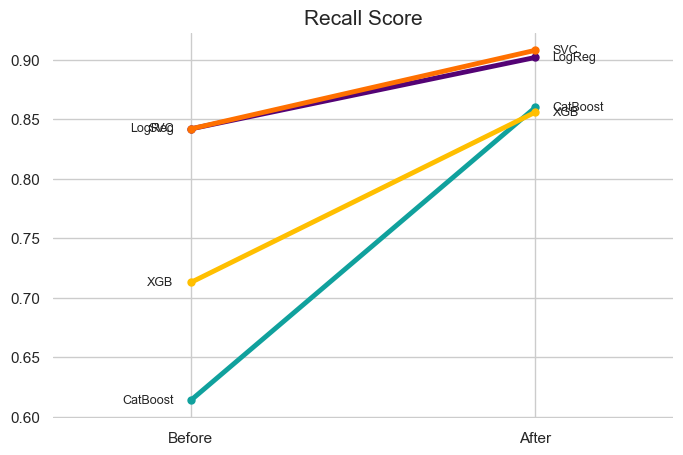

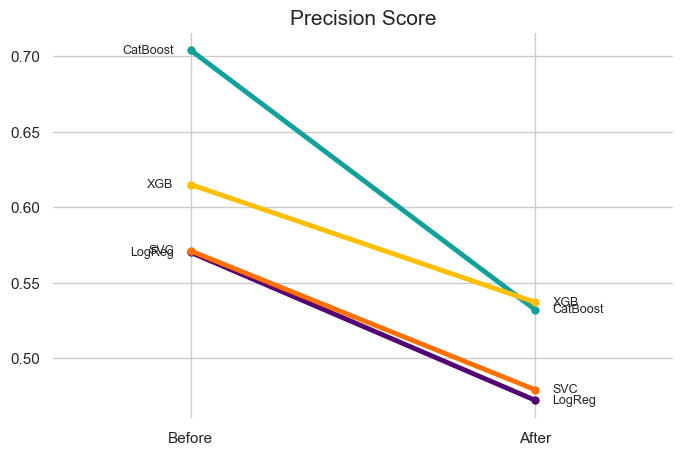

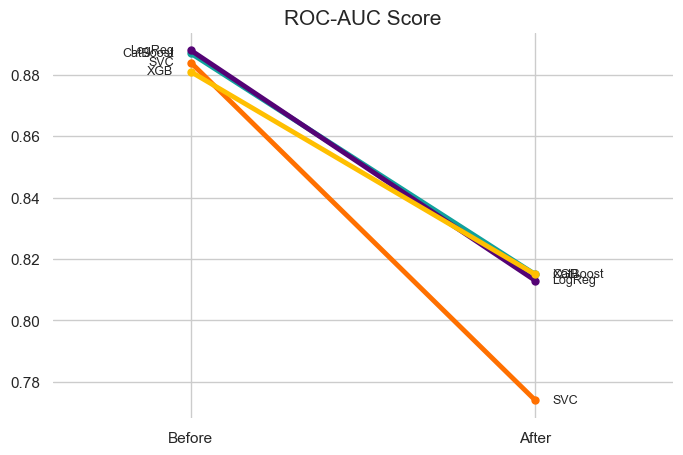

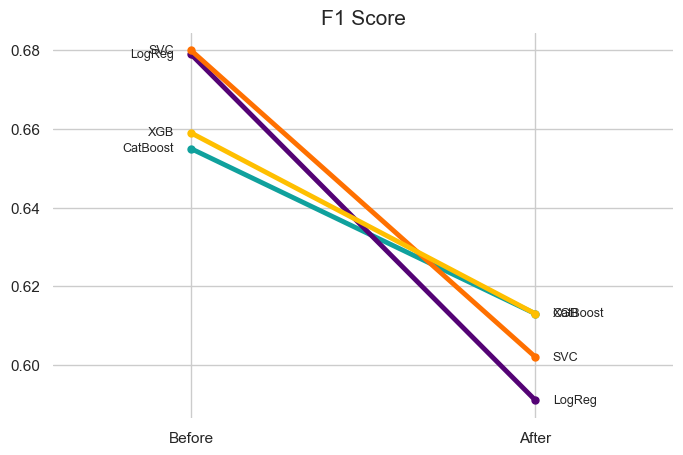

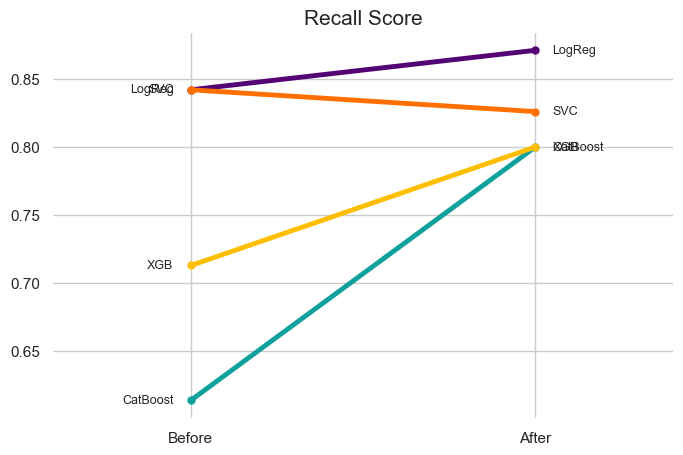

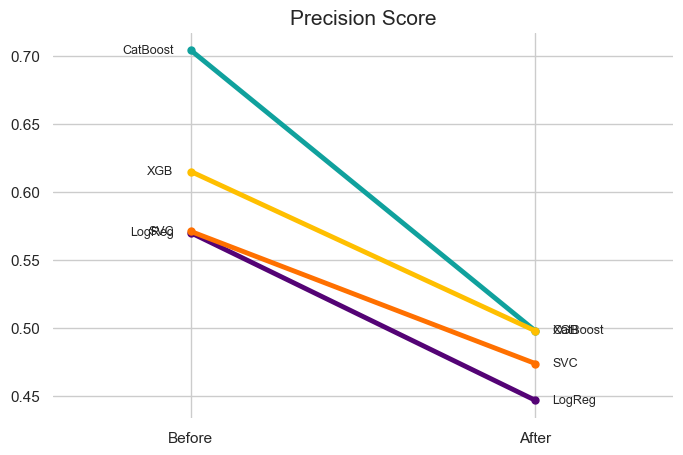

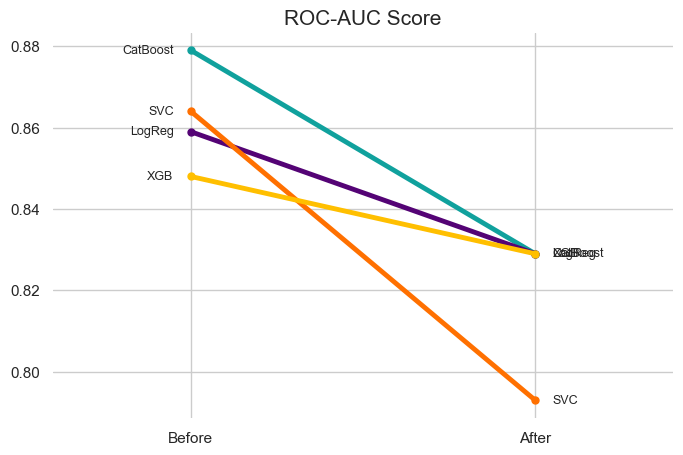

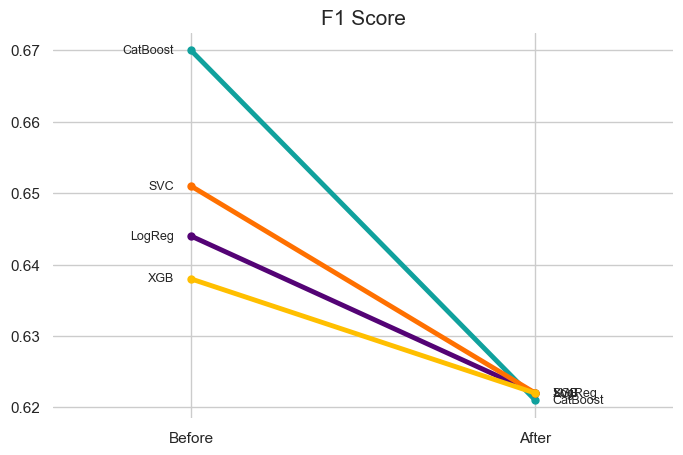

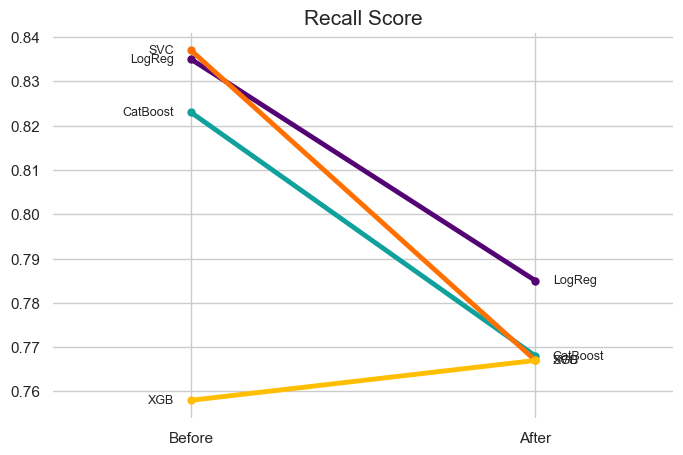

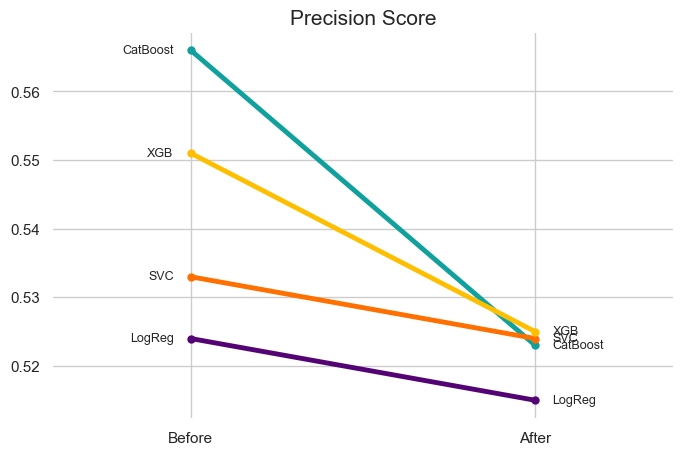

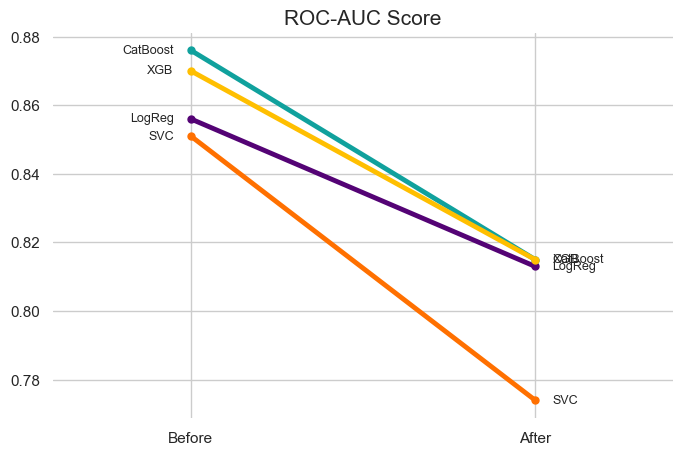

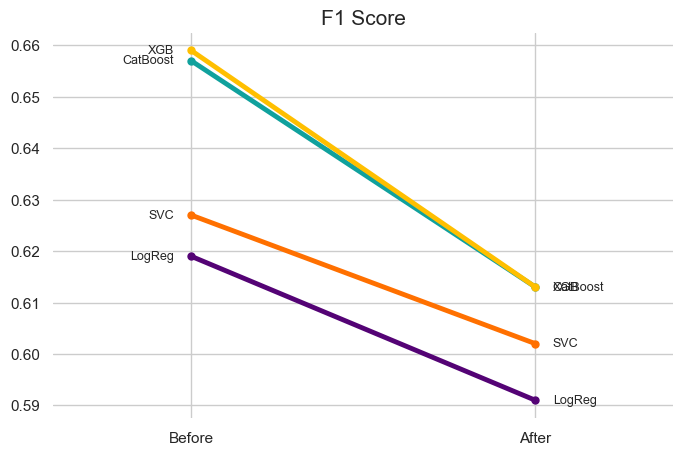

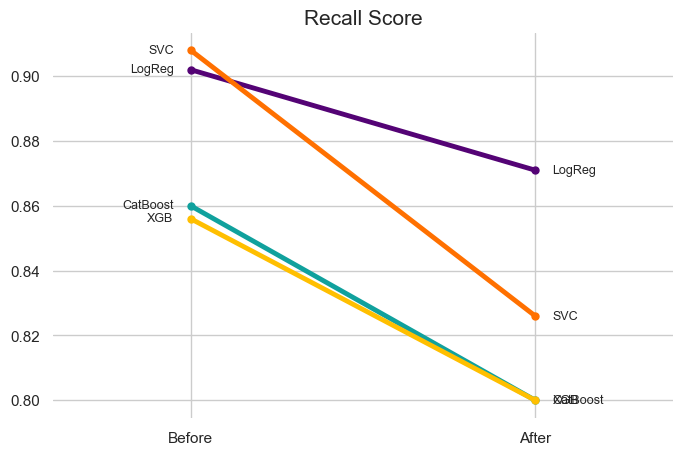

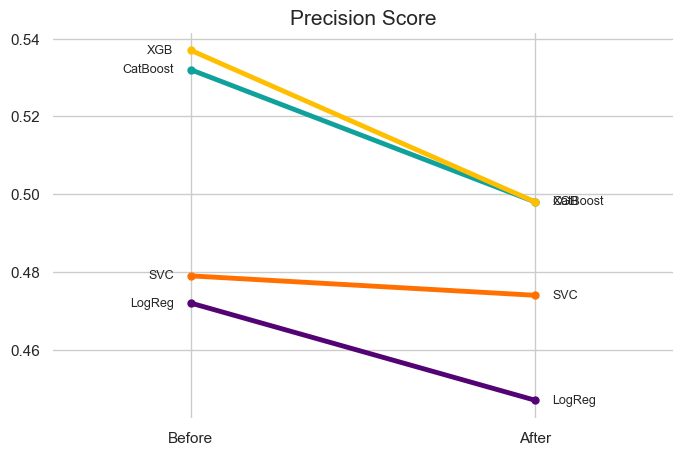

In [57]:
# ====================== HOW TO USE ======================
# 1) Classic "Before vs After" (if you have score_before / score_after)
plot_before_after(score_before, score_smote_anova, "Before Preprocessing", "After Preprocessing ANOVA")
plot_before_after(score_before, score_smote_chi2, "Before Preprocessing", "After Preprocessing SMOTE")

# 2) Compare selectors without SMOTE (ANOVA top-10 vs Chi-square top-10)
plot_before_after(anova_cv, chi2_cv, "ANOVA (Top 10)", "Chi-square (Top 10)")

# 3) Compare selectors with SMOTE
plot_before_after(score_smote_anova, score_smote_chi2, "SMOTE + ANOVA (Top 10)", "SMOTE + Chi-square (Top 10)")

In [58]:
# ---------- helpers ----------
def _ohe_compat():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Use only columns that exist
num_cols = [c for c in numeric_var if c in X_train.columns]
cat_cols = [c for c in categoric_var if c in X_train.columns]

# ---------- preprocessors with selection inside (so outer pipeline step is cleanly 'prep') ----------
# ANOVA: Standardize numerics, OHE categoricals, then SelectKBest(f_classif, k=10)
prep_anova10 = Pipeline([
    ("ct", ColumnTransformer([
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", _ohe_compat()),
        ]), cat_cols),
    ], remainder="drop", verbose_feature_names_out=True)),
    ("select", SelectKBest(score_func=f_classif, k=10)),
])

# Chi2: MinMax numerics to [0,1], OHE categoricals, then SelectKBest(chi2, k=10)
prep_chi210 = Pipeline([
    ("ct", ColumnTransformer([
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("mm", MinMaxScaler(feature_range=(0, 1))),  # chi2 requires non-negative
        ]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", _ohe_compat()),
        ]), cat_cols),
    ], remainder="drop", verbose_feature_names_out=True)),
    ("select", SelectKBest(score_func=chi2, k=10)),
])

# ---------- weights ----------
weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: float(weights[0]), 1: float(weights[1])}
scale_pos_weight = y_train.value_counts()[0] / max(y_train.value_counts()[1], 1)

# ---------- base estimators ----------
logreg = LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced', solver='lbfgs')
svc    = SVC(random_state=42, probability=True, class_weight='balanced')
xgbc   = xgb.XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight, n_jobs=-1)
catbc  = CatBoostClassifier(random_state=42, verbose=0, loss_function='Logloss',
                            class_weights=[class_weights[0], class_weights[1]])

# ---------- parameter grids (prefix 'algo__' as in your snippet) ----------
model_param = {
    'LogReg': [
        {
            'algo__fit_intercept': [True, False],
            'algo__C': np.array([1e-3, 1e-2, 1e-1, 1e+0, 1e+1, 1e+2, 1e+3])
        },
        logreg
    ],
    'SVC': [
        {
            'algo__gamma': np.array([1e-3, 1e-2, 1e-1]),
            'algo__C': np.array([1e+1, 1e+2, 1e+3])
        },
        svc
    ],
    'XGB': [
        {
            'algo__max_depth': [4, 6, 8],
            'algo__colsample_bytree': [0.5, 0.7, 0.9],
            'algo__n_estimators': [200, 400, 600],
            'algo__learning_rate': [0.03, 0.08, 0.15],
            'algo__gamma': [0, 5, 10]
        },
        xgbc
    ],
    'CatBoost': [
        {
            'algo__depth': [4, 6],
            'algo__n_estimators': [200, 400, 600],
            'algo__learning_rate': [0.03, 0.08, 0.15]
        },
        catbc
    ],
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

def run_grid_for_preprocessor(prep, name="ANOVA_top10", use_smote=False):
    """
    prep: a sklearn Pipeline that outputs numeric matrix (our prep_* above)
    use_smote: if True, wraps with imblearn Pipeline and adds SMOTEENN between prep and algo
    """
    from imblearn.combine import SMOTEENN
    smote_enn = SMOTEENN(random_state=42)

    results = []
    model_collect = []
    for model_name, (param_grid, base_est) in model_param.items():
        if use_smote:
            pipe = imbpipeline([('prep', prep), ('smote', smote_enn), ('algo', base_est)])
        else:
            pipe = Pipeline([('prep', prep), ('algo', base_est)])

        gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1,
            verbose=0
        )
        gs.fit(X_train, y_train)

        results.append({
            'selector/prep': name + (' + SMOTEENN' if use_smote else ''),
            'model': model_name,
            'best score': gs.best_score_,
            'best params': gs.best_params_,
            'estimator': gs.best_estimator_
        })
        model_collect.append(gs)

    df = pd.DataFrame(results).sort_values(by='best score', ascending=False, ignore_index=True)
    return df, model_collect

In [59]:
# ----------------- RUN: ANOVA top-10 -----------------
gs_anova, gs_models_anova = run_grid_for_preprocessor(prep_anova10, name="ANOVA_top10", use_smote=False)
print(">>> Grid Search (ANOVA top-10)")
display(gs_anova)

# ----------------- RUN: Chi2 top-10 ------------------
gs_chi2, gs_models_chi2 = run_grid_for_preprocessor(prep_chi210, name="Chi2_top10", use_smote=False)
print(">>> Grid Search (Chi-square top-10)")
display(gs_chi2)

# ----------------- OPTIONAL: SMOTE versions ----------
# gs_anova_smote, gs_models_anova_smote = run_grid_for_preprocessor(prep_anova10, name="ANOVA_top10", use_smote=True)
# display(gs_anova_smote)
# gs_chi2_smote, gs_models_chi2_smote = run_grid_for_preprocessor(prep_chi210, name="Chi2_top10", use_smote=True)
# display(gs_chi2_smote)

# Pick overall best estimator among those runs if you want:
best_overall = pd.concat([gs_anova, gs_chi2], ignore_index=True).sort_values('best score', ascending=False).iloc[0]
best_estimator = best_overall['estimator']
print("Best overall selector+model:")
display(best_overall)

>>> Grid Search (ANOVA top-10)


,selector/prep,model,best score,best params,estimator
0,ANOVA_top10,XGB,0.886012,"{'algo__colsample_bytree': 0.5, 'algo__gamma':...","((ColumnTransformer(transformers=[('num',\n ..."
1,ANOVA_top10,CatBoost,0.885623,"{'algo__depth': 4, 'algo__learning_rate': 0.03...","((ColumnTransformer(transformers=[('num',\n ..."
2,ANOVA_top10,SVC,0.867493,"{'algo__C': 100.0, 'algo__gamma': 0.01}","((ColumnTransformer(transformers=[('num',\n ..."
3,ANOVA_top10,LogReg,0.858770,"{'algo__C': 0.1, 'algo__fit_intercept': True}","((ColumnTransformer(transformers=[('num',\n ..."


>>> Grid Search (Chi-square top-10)


,selector/prep,model,best score,best params,estimator
0,Chi2_top10,XGB,0.832440,"{'algo__colsample_bytree': 0.5, 'algo__gamma':...","((ColumnTransformer(transformers=[('num',\n ..."
1,Chi2_top10,CatBoost,0.830664,"{'algo__depth': 4, 'algo__learning_rate': 0.03...","((ColumnTransformer(transformers=[('num',\n ..."
2,Chi2_top10,LogReg,0.829781,"{'algo__C': 0.01, 'algo__fit_intercept': True}","((ColumnTransformer(transformers=[('num',\n ..."
3,Chi2_top10,SVC,0.826501,"{'algo__C': 10.0, 'algo__gamma': 0.001}","((ColumnTransformer(transformers=[('num',\n ..."


Best overall selector+model:


selector/prep                                          ANOVA_top10
model                                                          XGB
best score                                                0.886012
best params      {'algo__colsample_bytree': 0.5, 'algo__gamma':...
estimator        ((ColumnTransformer(transformers=[('num',\n   ...
Name: 0, dtype: object

In [76]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score

# 1) Gather best candidates from whatever exists
all_results = []
for name in ["gs_anova", "gs_chi2", "gs_anova_smote", "gs_chi2_smote", "gs_df"]:
    try:
        df = eval(name)
        if isinstance(df, pd.DataFrame) and {"model","best score","estimator"}.issubset(df.columns):
            tmp = df.copy()
            tmp["source"] = name
            all_results.append(tmp[["model","best score","estimator","source"]])
    except NameError:
        pass

if not all_results:
    raise RuntimeError("No grid-search results found (e.g., gs_anova/gs_chi2/gs_df). Run tuning first.")

candidates = pd.concat(all_results, ignore_index=True)

# 2) Pick top-k by ROC-AUC (tweak k as you like)
k = min(3, len(candidates))   # try top 3 by default
topk = candidates.sort_values("best score", ascending=False, ignore_index=True).head(k)

# 3) Build voting estimators list (use distinct, readable names)
estimators = [(f"{row['model']}_{row['source']}", row["estimator"]) for _, row in topk.iterrows()]

# 4) Voting mode: soft if everyone has predict_proba; otherwise hard
all_proba = all(hasattr(est, "predict_proba") for _, est in estimators)
voting_mode = "soft" if all_proba else "hard"

# 5) Optional weights: use CV ROC-AUC as weights (only matters for soft voting)
weights = topk["best score"].to_numpy() if voting_mode == "soft" else None

vc = VotingClassifier(estimators=estimators, voting=voting_mode, weights=weights, flatten_transform=True)

print("Voting members:")
for (name, est), w in zip(estimators, weights if weights is not None else [None]*len(estimators)):
    print(f" - {name} | weight={None if w is None else round(float(w), 4)}")

print(f"\nVoting mode: {voting_mode}")

# 6) Cross-validate the VotingClassifier
scorers = {
    "roc_auc": "roc_auc",
    "f1": "f1",
    "recall": "recall",
    "precision": make_scorer(precision_score, zero_division=0),
}
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

vc_scores = cross_validate(vc, X_train, y_train, cv=cv, scoring=scorers, return_train_score=False)
vc_mean = {k: float(np.mean(v)) for k, v in vc_scores.items()}
vc_table = (
    pd.DataFrame({"Attribute": list(vc_mean.keys()), "VotingClassifier": list(vc_mean.values())})
      .query("Attribute.str.startswith('test_')", engine="python")
      .assign(Attribute=lambda d: d["Attribute"].str.replace("test_", "", regex=False))
      .set_index("Attribute")
      .round(3)
      .loc[["f1","precision","recall","roc_auc"]]
)

print("\n=== 10-fold CV (VotingClassifier) ===")
display(vc_table)

# 7) Fit on full training and evaluate on test with your helper
vc.fit(X_train, y_train)

# Ensure we have probabilities for ROC; if not, fall back gracefully
y_pred = vc.predict(X_test)
try:
    y_proba_pos = vc.predict_proba(X_test)[:, 1]
except Exception:
    if hasattr(vc, "transform"):  # soft voting with flatten_transform=True exposes averaged probs in transform()
        # transform returns per-class probabilities concatenated; take the positive class column
        tr = vc.transform(X_test)
        # If binary, the second column should be class-1 prob; but shape can vary by sklearn version
        # So we recompute from member predict_proba if needed:
        try:
            member_probs = np.column_stack([est.predict_proba(X_test)[:, 1] for _, est in estimators])
            y_proba_pos = member_probs.mean(axis=1) if weights is None else (member_probs * (weights/np.sum(weights))).sum(axis=1)
        except Exception:
            # last resort: decision_function average (degrades calibration)
            if all(hasattr(est, "decision_function") for _, est in estimators):
                raw = np.column_stack([est.decision_function(X_test) for _, est in estimators]).mean(axis=1)
                y_proba_pos = raw.astype(float)
            else:
                y_proba_pos = y_pred.astype(float)
    else:
        y_proba_pos = y_pred.astype(float)

# Use your plotting function (defined earlier)
#fig_cm, fig_report, fig_roc, best_thr = get_classification_report(y_test, y_pred, y_proba_pos)
#fig_cm.show()
#fig_report.show()
#fig_roc.show()
print(f"Best threshold by Youden's J (VotingClassifier): {best_thr:.4f}")

Voting members:
 - XGB_gs_anova | weight=0.886
 - CatBoost_gs_anova | weight=0.8856
 - SVC_gs_anova | weight=0.8675

Voting mode: soft

=== 10-fold CV (VotingClassifier) ===


,VotingClassifier
Attribute,
f1,0.677
precision,0.591
recall,0.793
roc_auc,0.884


Best threshold by Youden's J (VotingClassifier): 0.4917


In [66]:
print(score_before)

                LogReg    SVC    XGB  CatBoost
Attribute                                     
test_f1          0.679  0.680  0.659     0.655
test_precision   0.570  0.571  0.615     0.704
test_recall      0.842  0.842  0.713     0.614
test_roc_auc     0.888  0.884  0.881     0.887


Best threshold (min total cost): 0.1429
At best threshold:
{'tp': 277.0, 'tn': 369.0, 'fp': 408.0, 'fn': 3.0, 'precision': 0.404, 'recall': 0.989, 'f1': 0.574, 'retention campaign cost': 600.0, 'customer churn cost': 30.0, 'total cost': 630.0}


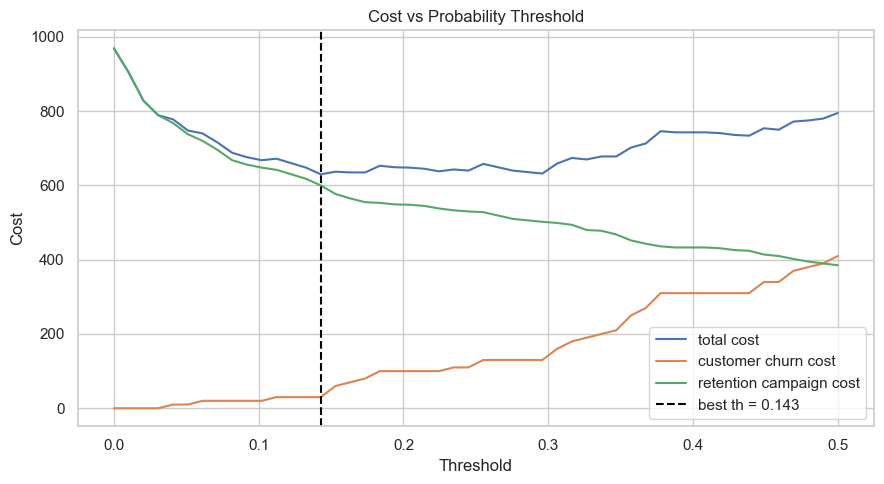

Best threshold (min total cost): 0.1429


,threshold,tp,tn,fp,fn,precision,recall,f1,retention campaign cost,customer churn cost,total cost
14,0.143,277,369,408,3,0.404,0.989,0.574,600.0,30.0,630.0
29,0.296,267,467,310,13,0.463,0.954,0.623,502.0,130.0,632.0
17,0.173,272,414,363,8,0.428,0.971,0.595,555.0,80.0,635.0
16,0.163,273,404,373,7,0.423,0.975,0.590,565.0,70.0,635.0
28,0.286,267,463,314,13,0.460,0.954,0.620,506.0,130.0,636.0


In [68]:
# Inputs you already have:
# y_test : Series/array of 0/1
# probs  : array of positive-class probabilities from best_estimator

# Get positive-class probabilities for X_test
est = best_estimator  # or vc if you're using the VotingClassifier

try:
    # preferred: true probabilities
    probs = est.predict_proba(X_test)[:, 1]
except Exception:
    # fallback: map decision_function scores to [0,1] so your 0.6/0.8 buckets still work
    if hasattr(est, "decision_function"):
        from sklearn.preprocessing import MinMaxScaler
        raw = est.decision_function(X_test).astype(float).reshape(-1, 1)
        probs = MinMaxScaler().fit_transform(raw).ravel()
    else:
        raise AttributeError(
            "Your estimator doesn't expose predict_proba or decision_function. "
            "Enable probabilities (e.g., SVC(probability=True)) or use a probabilistic model."
        )

def tune_threshold_cost(
    y_true,
    probs,
    th_grid=None,
    tier_bounds=(0.6, 0.8, 1.0),      # risk bins: [th,0.6)->tier1, [0.6,0.8)->tier2, [0.8,1)->tier3
    tier_costs={1:1.0, 2:2.0, 3:3.0}, # outreach cost weights per tier (you can put $ here)
    churn_cost_per_cust=10.0          # cost of missing a churner (FN)
):
    """
    Returns: cost_df (per-threshold metrics/costs), best_row (row with min total cost)
    """
    y_true = np.asarray(y_true).astype(int)
    p = np.asarray(probs, dtype=float)
    n = len(p)
    if th_grid is None:
        th_grid = np.linspace(0, 0.5, 50)  # your original range

    # Pre-build cost lookup for tiers as an array (index 0..3)
    tier_cost_vec = np.zeros(4, dtype=float)
    for k,v in tier_costs.items():
        tier_cost_vec[int(k)] = float(v)

    # unpack bounds
    b1, b2, b3 = tier_bounds

    rows = []
    for th in th_grid:
        # Predictions at this threshold
        y_pred = (p >= th).astype(int)

        # Confusion counts
        tp = int(((y_pred == 1) & (y_true == 1)).sum())
        tn = int(((y_pred == 0) & (y_true == 0)).sum())
        fp = int(((y_pred == 1) & (y_true == 0)).sum())
        fn = int(((y_pred == 0) & (y_true == 1)).sum())

        # Dynamic risk category (depends on current threshold for tier 1 lower bound)
        # 1: [th, b1), 2: [b1, b2), 3: [b2, b3), else 0
        rc = np.select(
            condlist=[(p >= th) & (p < b1), (p >= b1) & (p < b2), (p >= b2) & (p < b3)],
            choicelist=[1, 2, 3],
            default=0
        ).astype(int)

        # Outreach cost only for FP cases (pred=1 but true=0), weighted by tier
        fp_mask = (y_pred == 1) & (y_true == 0)
        # map tier -> cost via vector: cost = sum( tier_cost_vec[rc] ) over FP positions
        outreach_cost = float(tier_cost_vec[rc][fp_mask].sum())

        # Churn cost for FN cases (missed churners)
        churn_cost = float(fn) * float(churn_cost_per_cust)

        total_cost = outreach_cost + churn_cost

        # Metrics (optional, handy to see tradeoffs)
        prec = tp / (tp + fp) if (tp + fp) else 0.0
        rec  = tp / (tp + fn) if (tp + fn) else 0.0
        f1   = 2*prec*rec / (prec + rec) if (prec + rec) else 0.0

        rows.append({
            "threshold": th,
            "tp": tp, "tn": tn, "fp": fp, "fn": fn,
            "precision": prec, "recall": rec, "f1": f1,
            "retention campaign cost": outreach_cost,
            "customer churn cost": churn_cost,
            "total cost": total_cost
        })

    cost_df = pd.DataFrame(rows)

    # Best threshold (minimum total cost)
    best_idx = int(cost_df["total cost"].idxmin())
    best_row = cost_df.loc[best_idx].to_dict()

    return cost_df, best_row

# ---- Run tuning (use your probs & y_test) ----
cost_df, best = tune_threshold_cost(
    y_true=y_test,
    probs=probs,
    th_grid=np.linspace(0, 0.5, 50),     # keep your sweep
    tier_bounds=(0.6, 0.8, 1.0),         # same buckets you used
    tier_costs={1:1.0, 2:2.0, 3:3.0},    # change to $ if you have them
    churn_cost_per_cust=10.0             # your original FN cost
)

print("Best threshold (min total cost):", round(best["threshold"], 4))
print("At best threshold:")
print({k: (round(v,3) if isinstance(v,float) else v)
       for k,v in best.items()
       if k in ["tp","tn","fp","fn","precision","recall","f1",
                "retention campaign cost","customer churn cost","total cost"]})

# ---- Plot curves & mark optimum ----
plt.figure(figsize=(9,5))
sns.lineplot(data=cost_df, x="threshold", y="total cost", label="total cost")
sns.lineplot(data=cost_df, x="threshold", y="customer churn cost", label="customer churn cost")
sns.lineplot(data=cost_df, x="threshold", y="retention campaign cost", label="retention campaign cost")
plt.axvline(best["threshold"], color="black", linestyle="--", linewidth=1.5, label=f"best th = {best['threshold']:.3f}")
plt.title("Cost vs Probability Threshold")
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.legend()
plt.tight_layout()
plt.show()


cost_df, best = tune_threshold_cost(
    y_true=y_test,
    probs=probs,
    th_grid=np.linspace(0, 0.5, 50),
    tier_bounds=(0.6, 0.8, 1.0),
    tier_costs={1:1.0, 2:2.0, 3:3.0},
    churn_cost_per_cust=10.0
)

print("Best threshold (min total cost):", round(best["threshold"], 4))
display(cost_df.sort_values("total cost").head(5).round(3))

In [71]:
from IPython.display import display
import shap

# ---- 0) Plotly-like JS init for SHAP
shap.initjs()

# ---- 1) Build a clean preprocessor from your var lists
def _ohe_compat():
    try:
        return OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:  # sklearn < 1.2
        return OneHotEncoder(handle_unknown="ignore", sparse=False)

# Use only columns available in X_train
num_cols = [c for c in numeric_var if c in X_train.columns]
cat_cols = [c for c in categoric_var if c in X_train.columns]

preprocessor_shap = ColumnTransformer([
    ("num", Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("sc", StandardScaler()),
    ]), num_cols),
    ("cat", Pipeline([
        ("imp", SimpleImputer(strategy="most_frequent")),
        ("ohe", _ohe_compat()),
    ]), cat_cols),
], remainder="drop", verbose_feature_names_out=True)

# Fit on train, transform both
preprocessor_shap.fit(X_train, y_train)
tranf_var_name = preprocessor_shap.get_feature_names_out().tolist()

X_train_trans = pd.DataFrame(preprocessor_shap.transform(X_train), columns=tranf_var_name)
X_test_trans  = pd.DataFrame(preprocessor_shap.transform(X_test),  columns=tranf_var_name)

# ---- 2) Get best CatBoost params from gs_df (strip 'algo__' prefix)
def strip_algo_prefix(d):
    out = {}
    for k, v in d.items():
        out[k[6:]] = v if k.startswith('algo__') else v
    return out

try:
    best_params_raw = gs_df.iloc[0]['best params']
    p = strip_algo_prefix(best_params_raw)
except Exception:
    p = {}
p.setdefault('loss_function', 'Logloss')
p.setdefault('random_seed', 42)
p.setdefault('verbose', 0)

# ---- 3) Fit CatBoost on transformed data
clf = CatBoostClassifier(**p)
clf.fit(X_train_trans, y_train, verbose=0)

# ---- 4) SHAP values (positive class)
explainer = shap.TreeExplainer(clf)
shap_raw = explainer.shap_values(X_test_trans)

if isinstance(shap_raw, list) and len(shap_raw) >= 2:
    shap_pos = shap_raw[1]  # class 1
    expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
else:
    shap_pos = shap_raw
    expected_value = explainer.expected_value if not isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value[1]

df_shap = pd.DataFrame(shap_pos, columns=tranf_var_name)

# ---- 5) Your selected features (base names). We'll map to actual transformed cols.
selected_feat = ['Contract','Number of Referrals','Internet Service','Number of Dependents',
                 'Tenure Months','Payment Method','Monthly Charges']  # add more if you like

# Map base names → actual OHE/num column names; pick the most influential OHE level if multiple
selected_map = {}
for base in selected_feat:
    # exact match
    if base in df_shap.columns:
        selected_map[base] = base
        continue
    # prefixed exact
    if f"num__{base}" in df_shap.columns:
        selected_map[base] = f"num__{base}"
        continue
    if f"cat__{base}" in df_shap.columns:
        selected_map[base] = f"cat__{base}"
        continue
    # search any column containing the token
    cands = [c for c in df_shap.columns if base in c]
    if cands:
        best = df_shap[cands].abs().mean().sort_values(ascending=False).index[0]
        selected_map[base] = best

selected_cols = [selected_map[b] for b in selected_feat if b in selected_map]
if not selected_cols:
    raise ValueError("None of the selected base feature names matched transformed columns. "
                     "Inspect `tranf_var_name` to use exact names.")

# Slice to selected set
df_shap_sel = df_shap[selected_cols]
X_test_sel  = X_test_trans[selected_cols]

# ---- 6) Pick an instance to explain: highest predicted churn probability
probs = clf.predict_proba(X_test_trans)[:, 1]
top_idx = int(np.argmax(probs))

# ---- 7) Force plot for that instance (interactive) + HTML backup
force_plot = shap.force_plot(
    base_value=expected_value,
    shap_values=df_shap_sel.iloc[top_idx].values,
    features=X_test_sel.iloc[top_idx].values,
    feature_names=[k for k in selected_feat if k in selected_map],
    matplotlib=False
)
force_plot
shap.save_html("shap_force_top_instance.html", force_plot)
print("Saved interactive force plot to shap_force_top_instance.html")

Saved interactive force plot to shap_force_top_instance.html


<Figure size 1000x380 with 0 Axes>

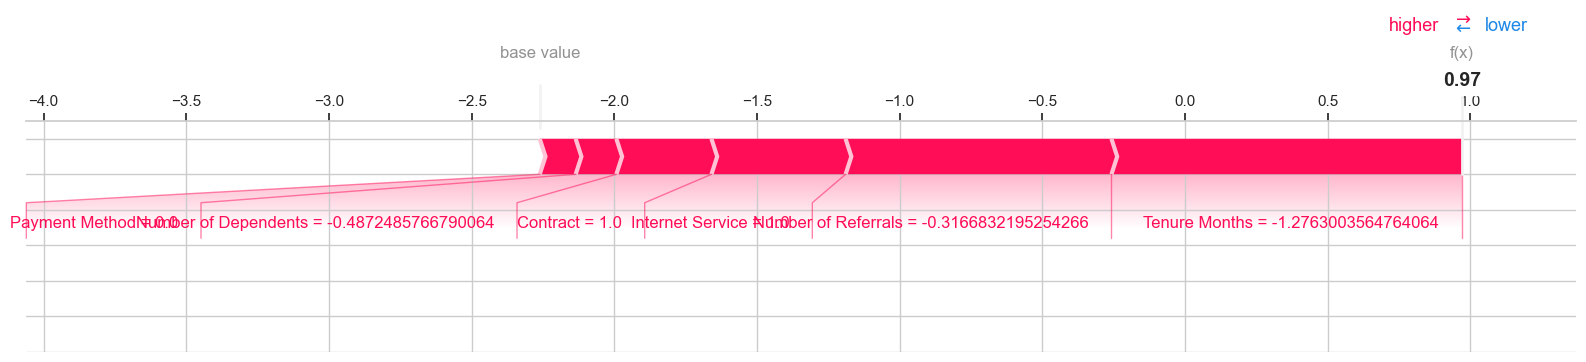

In [74]:
plt.figure(figsize=(10, 2 + 0.3*len(X_test_sel.columns)))  # adjust height to #features
_ = shap.force_plot(
    base_value=expected_value,
    shap_values=df_shap_sel.iloc[top_idx].values,
    features=X_test_sel.iloc[top_idx].values,
    feature_names=[k for k in selected_feat if k in selected_map],
    matplotlib=True,
    show=True
)
plt.show()

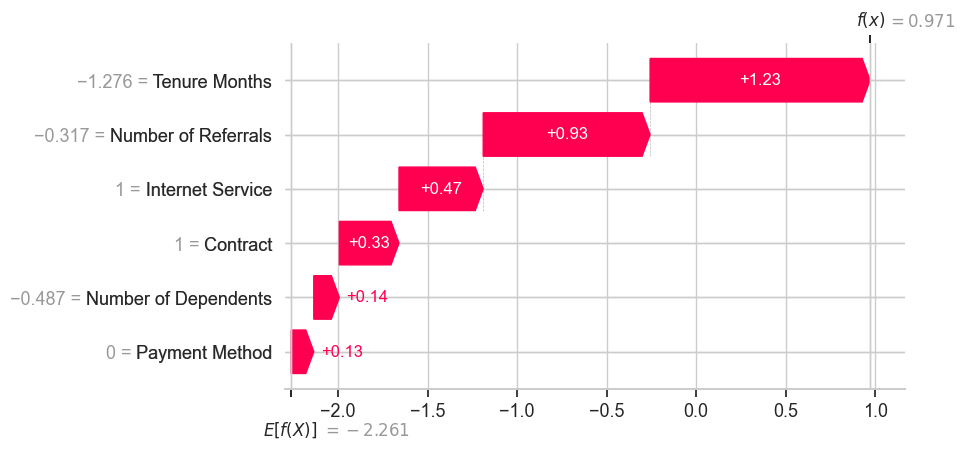

In [75]:
exp = shap.Explanation(
    values=df_shap_sel.iloc[top_idx].values,
    base_values=float(expected_value),
    data=X_test_sel.iloc[top_idx].values,
    feature_names=[k for k in selected_feat if k in selected_map]
)
shap.plots.waterfall(exp, max_display=len(X_test_sel.columns))